# <p style="font-family: fantasy; color: rgb(100, 200, 100);">PREDICCÓN DE DESERCIÓN LABORAL DE EMPLEADOS</p>

### <p style="font-family: fantasy; color='green';opacity: 0.95;">Entender el problema</p>

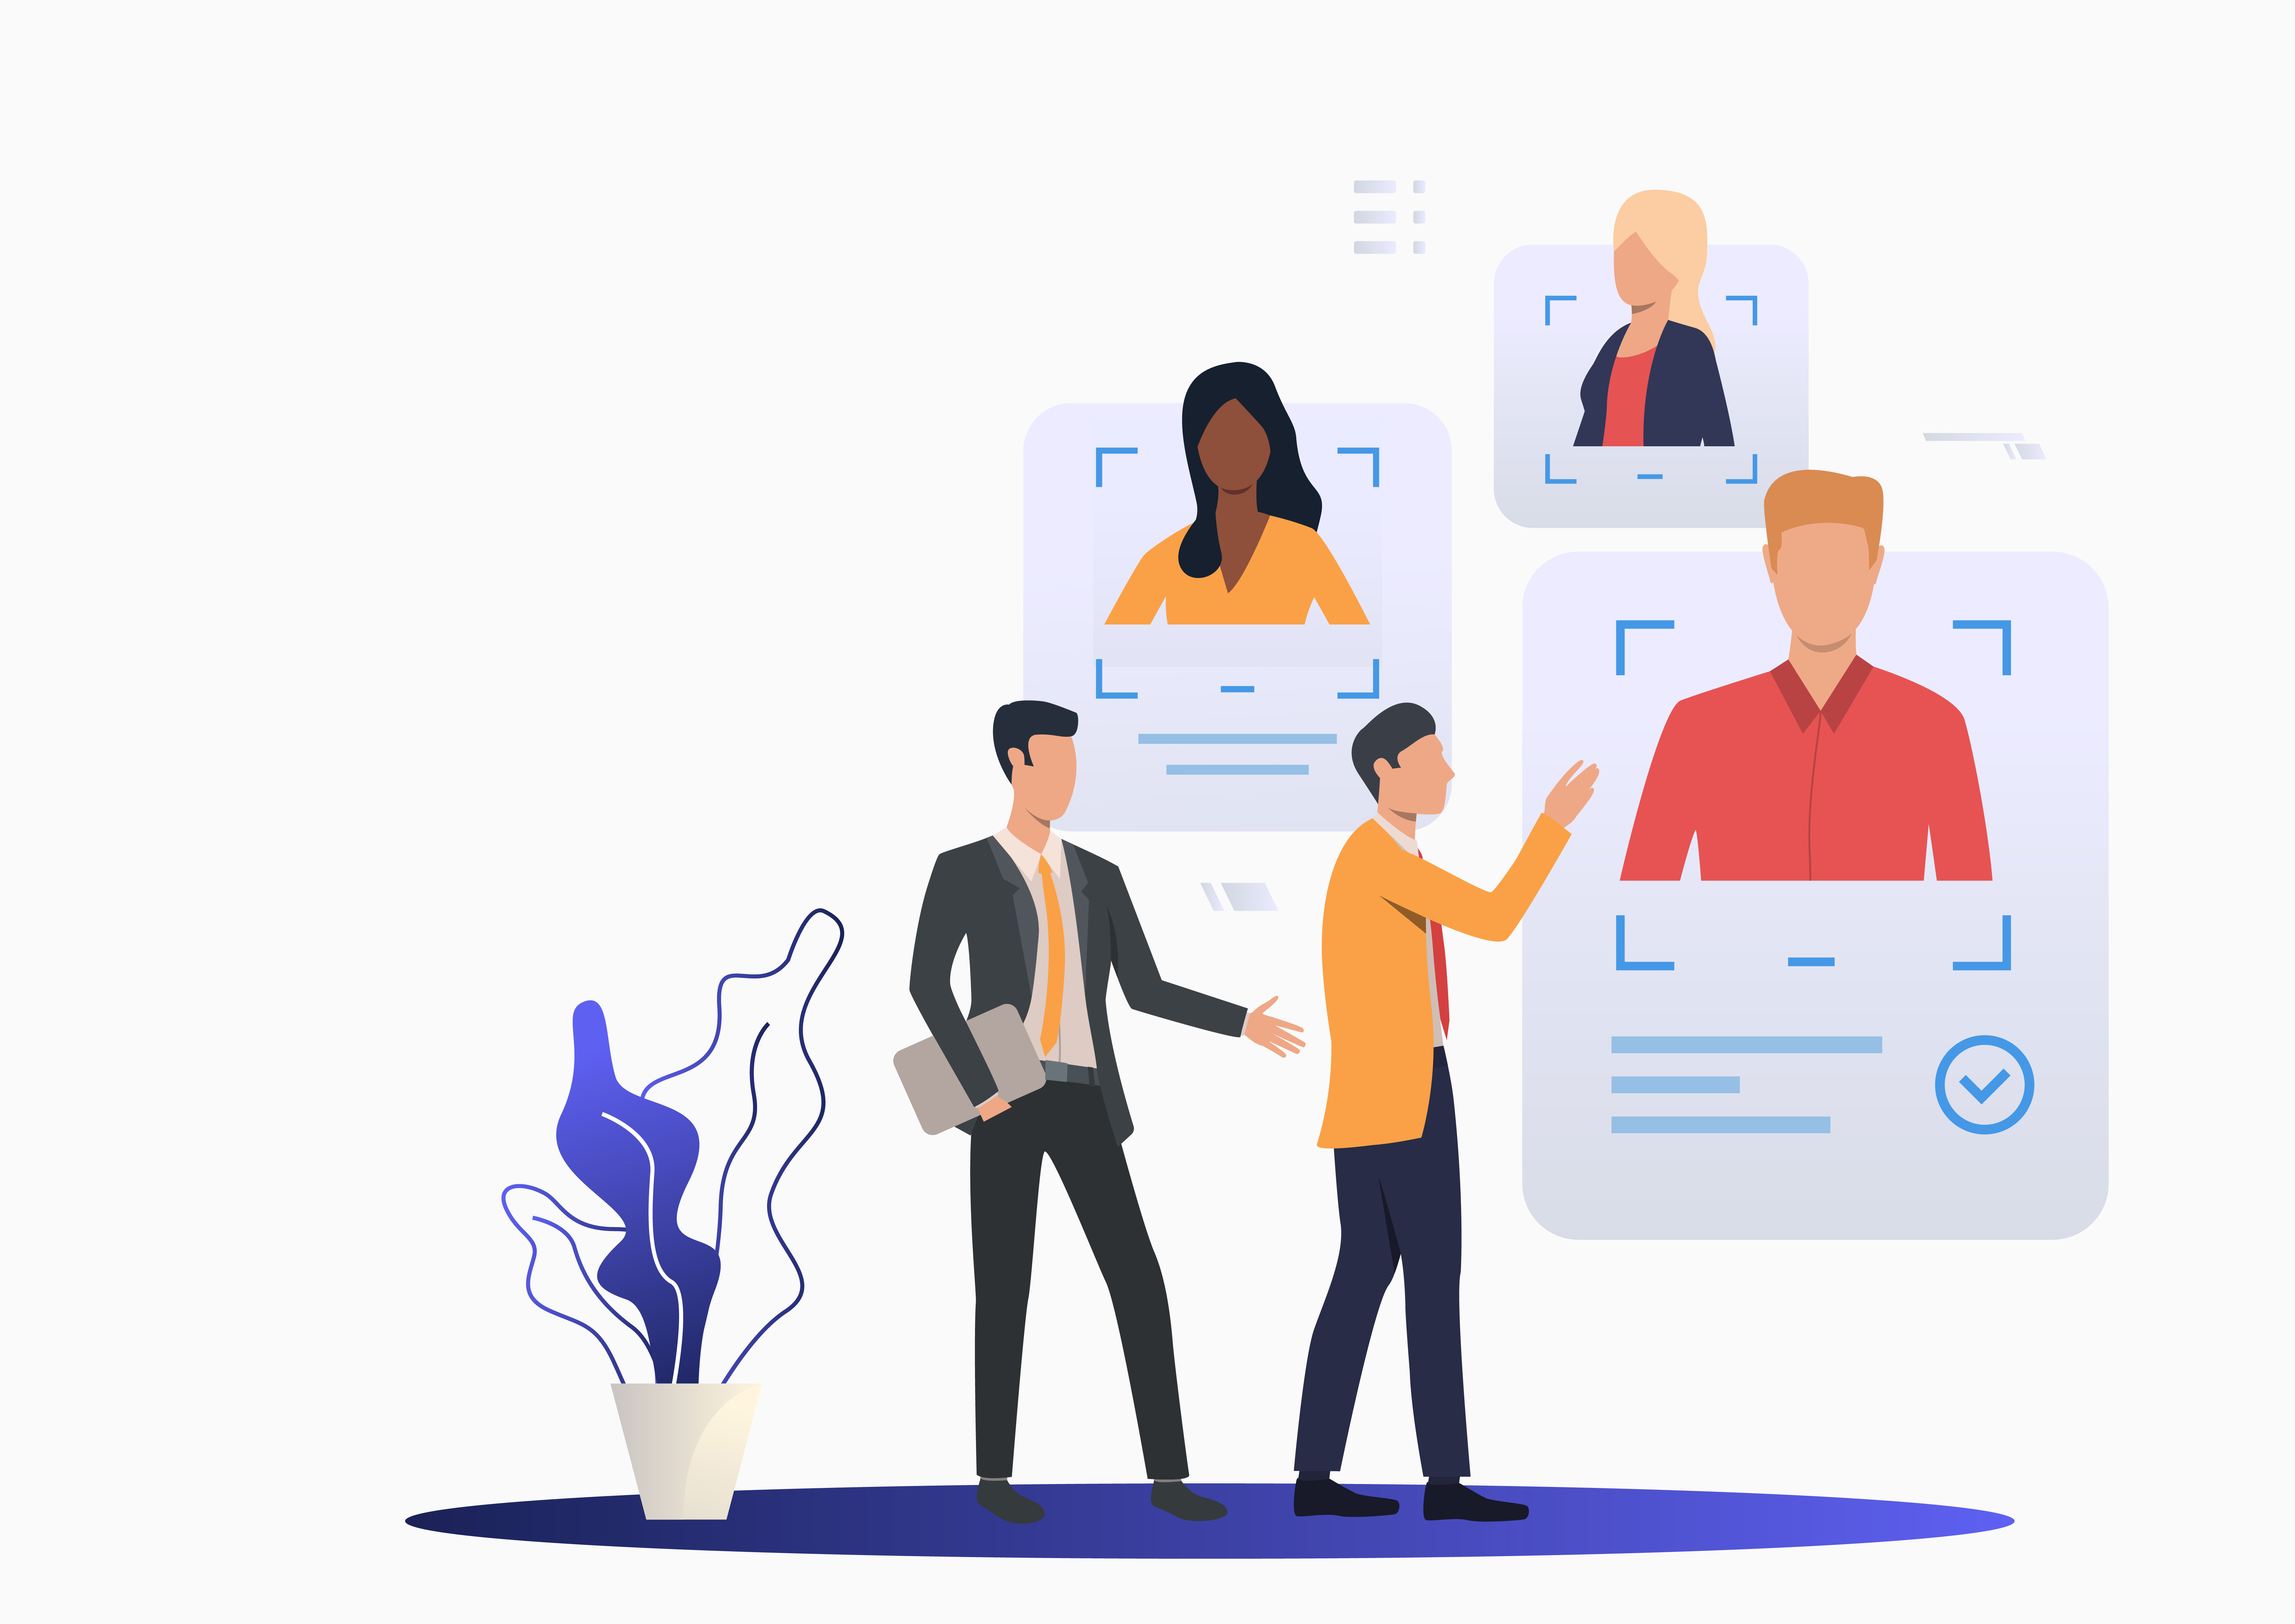

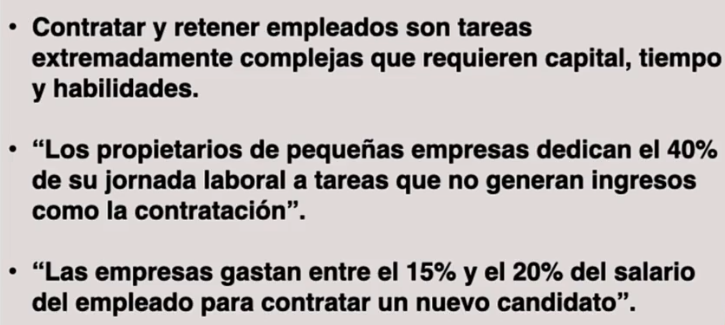

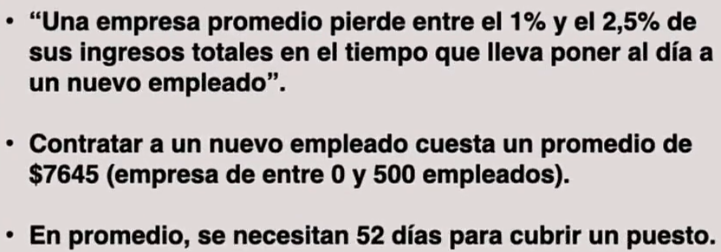

[fuente](https://toggl.com/blog/cost-of-hiring-an-employee)

### <p style="font-family: fantasy; color='green';opacity: 0.95;">Dataset</p>

[KAGGLE](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

CONTEXTO DEL PROBLEMA:

El equipo de recursos humanos recopiló una gran cantidad de datos sobre sus empleados y solicitan al departamento de data science desarrollar un modelo que pueda predecir que empleados tienen más probabilidades de renunciar.

INFORMACION DE LOS DATOS:

- Participación laboral
- Educación
- Satisfacción laboral
- Clasificación de rendimiento
- Satisfacción
- Equilibrio trabajo-vida
- ...
- Attrition: deserción (Target)

### <p style="font-family: fantasy; color='green';opacity: 0.95;">Importar librerias</p>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import mplcyberpunk

### <p style="font-family: fantasy; color='green';opacity: 0.95;">Cargar los datos</p>

In [ ]:
df = pd.read_csv("../data/Human_Resources.csv")
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

* Se observa que el conjunto de datos esta compuesto por 1470 filas y 35 columnas

In [ ]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

* Se observa que la minima edad de los empleados es de 18 años y la máxima es de 60 años.
* El mínimo número de empleado es de 1 y max es de 2068.
* la tarifa por hora minima es de $30 y la maxima de $100, donde el promedio es de $65.

In [ ]:
df.describe(include=["object"])

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054

* Se observa datos desbalanceados respecto a nuestra variable objetivo
* Se observa mayor presencia de empleados varones.
* La mayoria de empleado esta casado.
* La mayoria de empleados no realiza horas extras.

### <p style="font-family: fantasy; color='green';opacity: 0.95;">Visualización de datos</p>

#### Busqueda de datos faltante

<Axes: >

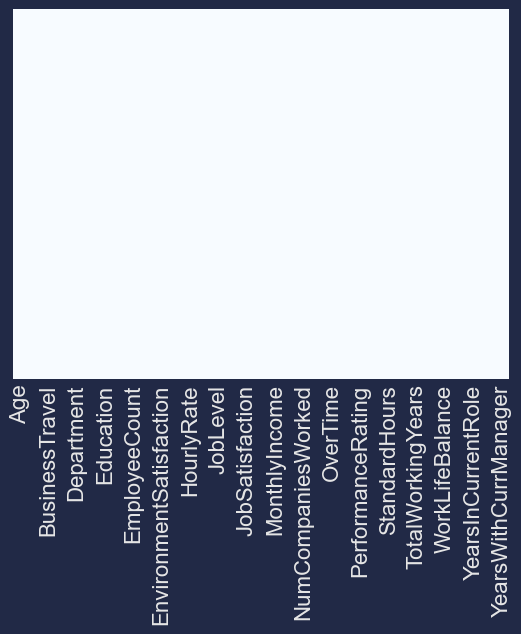

In [ ]:
# df.isna().sum()
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

* No hay presencia de datos faltantes

#### Busqueda de datos duplicados

In [ ]:
df.duplicated().sum()

0

* No hay presencia de datos duplicados

#### ANALISIS UNIVARIADO

In [ ]:
# define numerical and categorical features
num_features = list(df.select_dtypes(exclude=[object]).columns)
cat_features = list(df.select_dtypes(include=[object]).columns)

print(f"There are {len(num_features)} numerical features: {num_features}")
print(f"There are {len(cat_features)} categorical features: {cat_features}")

There are 26 numerical features: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
There are 9 categorical features: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [ ]:
# Mostrar aquellas columnas que no tienen elementos variables
for col in num_features:
    if len(list(df[f'{col}'].unique())) < 2:
        print(f"{col}: {df[f'{col}'].unique()} \n")

EmployeeCount: [1] 

StandardHours: [80] 



In [ ]:
for col in cat_features:
    print(f"{col}: {df[f'{col}'].unique()} \n")

Attrition: ['Yes' 'No'] 

BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

Department: ['Sales' 'Research & Development' 'Human Resources'] 

EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Gender: ['Female' 'Male'] 

JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] 

MaritalStatus: ['Single' 'Married' 'Divorced'] 

Over18: ['Y'] 

OverTime: ['Yes' 'No'] 



In [ ]:
# Eliminando campos que no aportaran informacion al modelo
df.drop(["EmployeeCount","StandardHours","Over18","EmployeeNumber"], axis=1, inplace=True)
df.shape

(1470, 31)

In [ ]:
# Reemplazar las columnas "Attrition" y "Overtime"  por valores enteros
df["Attrition"] = df["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)
df["OverTime"] = df["OverTime"].apply(lambda x: 1 if x == "Yes" else 0)
# 0:No 1: Yes

#### Distribucion de los datos

In [ ]:
def graph_categorical_numerical_columns(columnas, num_filas, num_columnas):
    # Calcular el número de filas y columnas en la disposición de subplots
    #num_filas = 3
    #num_columnas = 2

    # Crear la figura y los subplots
    fig, axs = plt.subplots(num_filas, num_columnas, figsize=(7, 14))
    plt.style.use('cyberpunk')
    mplcyberpunk.add_glow_effects()
    # Aplanar los subplots en un arreglo unidimensional
    axs = axs.flatten()

    # Iterar sobre las columnas y graficar los histogramas en los subplots correspondientes
    for i, columna in enumerate(columnas):
        if df[columna].dtype == 'object':
            # Si es una columna categórica, contar las ocurrencias de cada categoría
            counts = df[columna].value_counts()
            axs[i].bar(counts.index, counts.values, edgecolor='white')
            axs[i].set_title(columna)
        else:
            # Si es una columna numérica, graficar el histograma
            axs[i].hist(df[columna], edgecolor='white')
            axs[i].set_title(columna)
        axs[i].tick_params(axis='x', rotation=90)
    # Ajustar los espacios entre subplots
    plt.tight_layout()

    # Mostrar la figura con los histogramas
    plt.show()

In [ ]:
num_features = list(df.select_dtypes(exclude=[object]).columns)
cat_features = list(df.select_dtypes(include=[object]).columns)

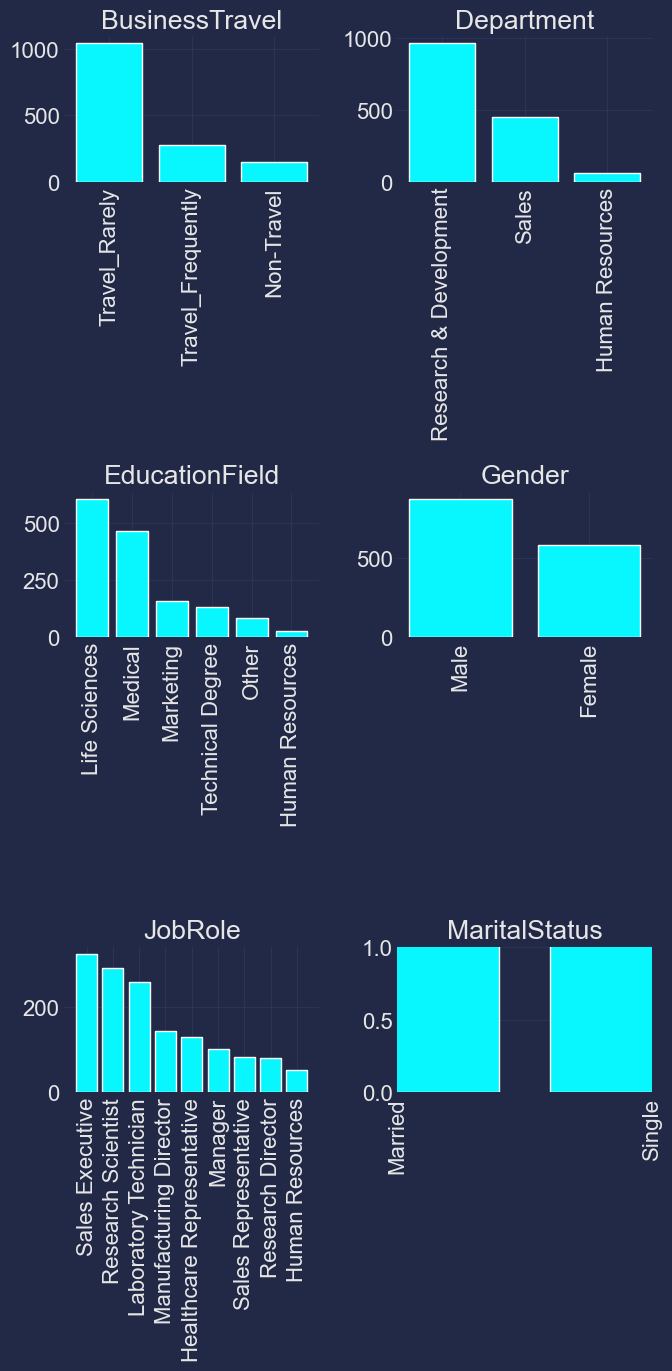

In [ ]:
columnas = cat_features
graph_categorical_numerical_columns(cat_features, 3,2)

REPRESENTACION PORCENTUAL

In [ ]:
def graph_precentaje_pie_cat(cat_vars):
    plt.figure(figsize=(15,25))

    # Configurar el tamaño de fuente de los valores en la gráfica
    plt.rcParams.update({'font.size': 16})
    # Crear un gráfico de barras para cada columna categórica
    #plt.figure(figsize=(15, 25))
    for i, var in enumerate(cat_vars):
        plt.subplot(4, 2, i+1)
        df[var].value_counts().plot(kind='pie',autopct='%.1f%%',shadow = True)
        centre_circle = plt.Circle((0,0),0.70,fc='black')
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)
        plt.ylabel('')
        plt.title(var)

    plt.tight_layout()
    plt.show()

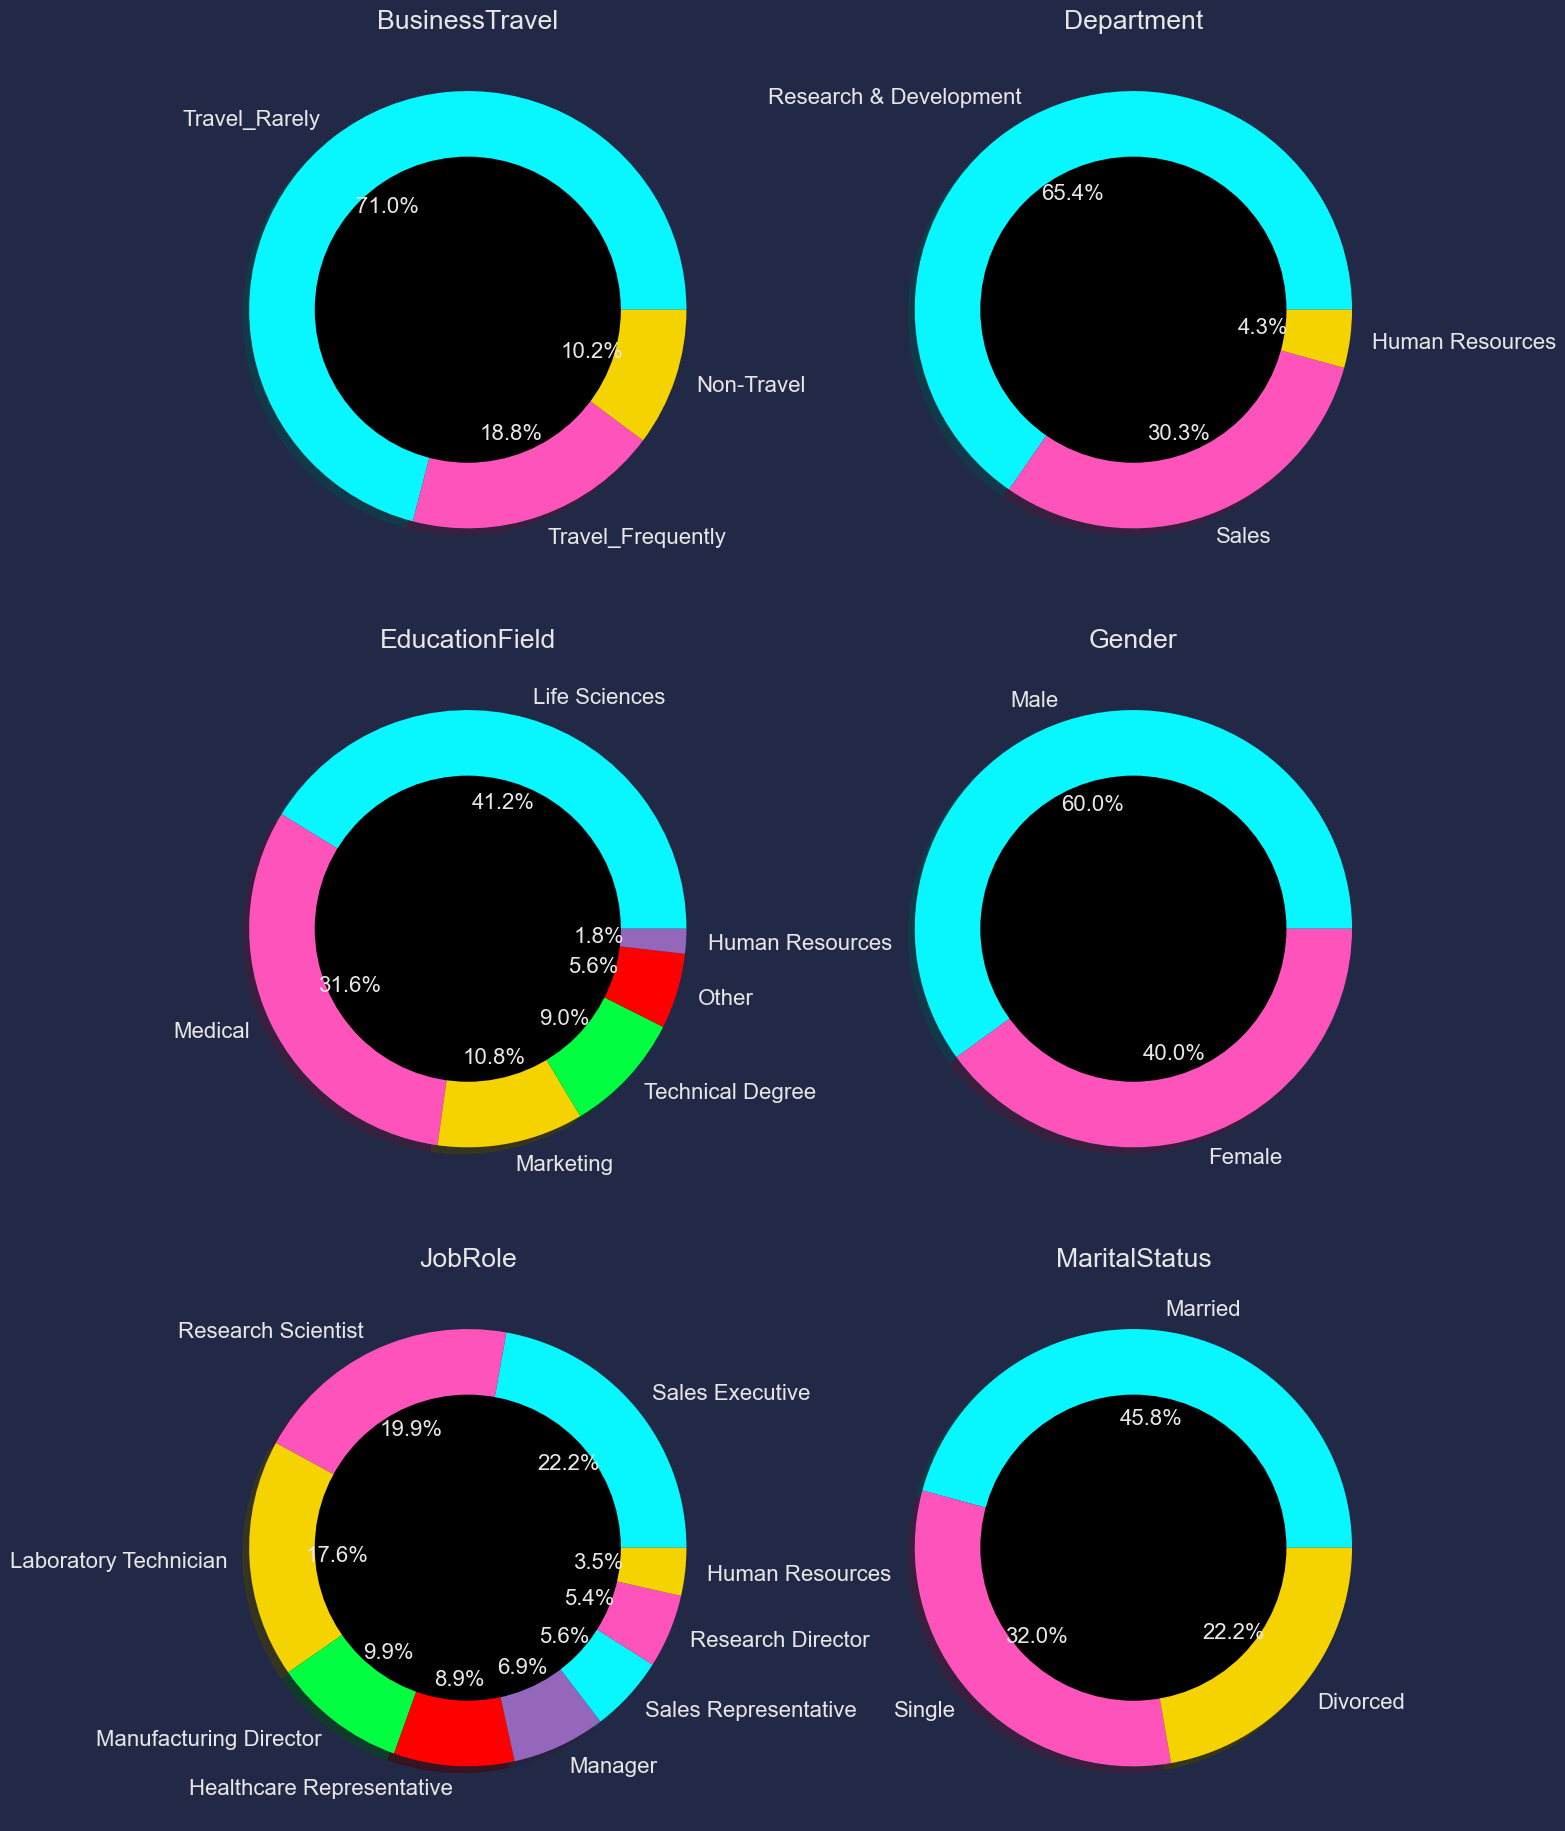

In [ ]:
#cat = cat_features.remove("Over18")
graph_precentaje_pie_cat(cat_features)

In [ ]:
# Función para visualizar la distribucion de los datos y estadisticos
def show_distribution(var_data, colname):
    #from matplotlib import pyplot as plt

    # Obtener estadísticas
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    std_val = var_data.std()
    mod_val = var_data.mode()[0]

    """
    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nStd:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            std_val,
                                                                                            max_val
                                                                                            ))
                                                                                            """

    # Crear un figura para 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (8,5))

    # Plotear el histograma 
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Agregar líneas para la media, la mediana y la moda
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plotear el boxplot   
    ax[1].h(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Agregar título 
    fig.suptitle(f'{colname} Distribution')

    # Mostrar la figura
    fig.show()

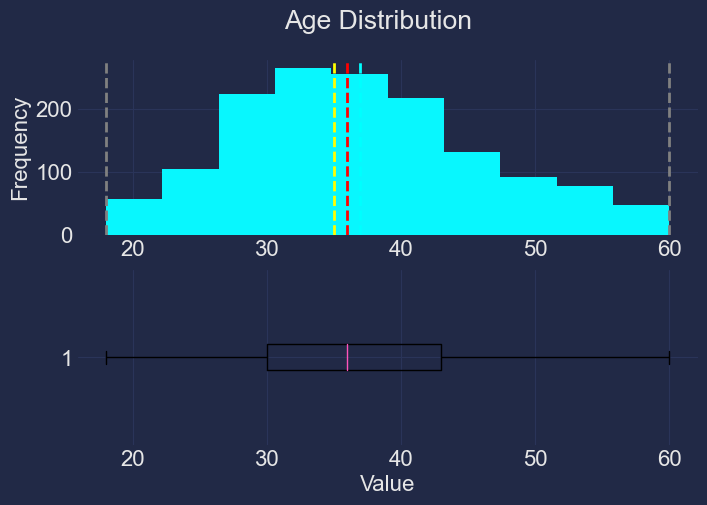

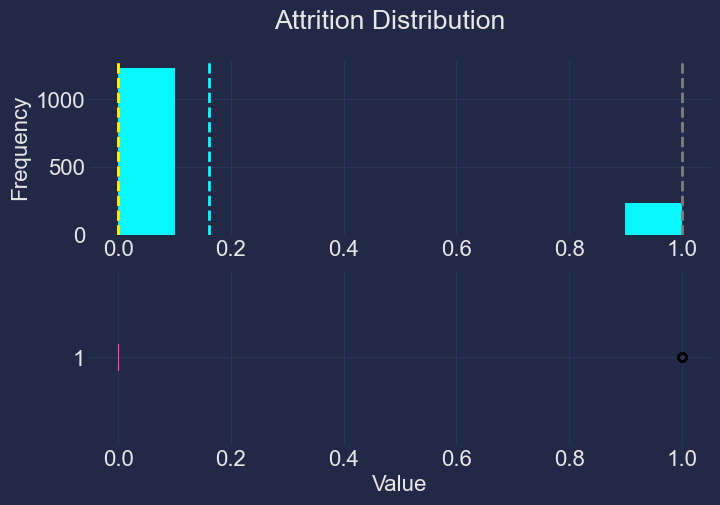

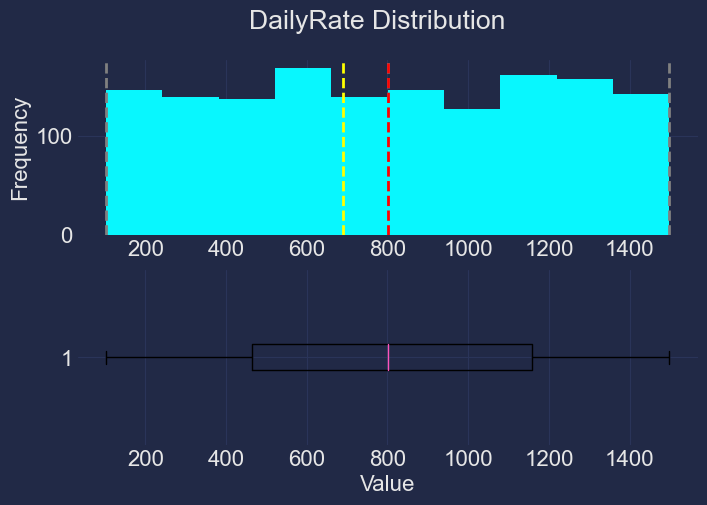

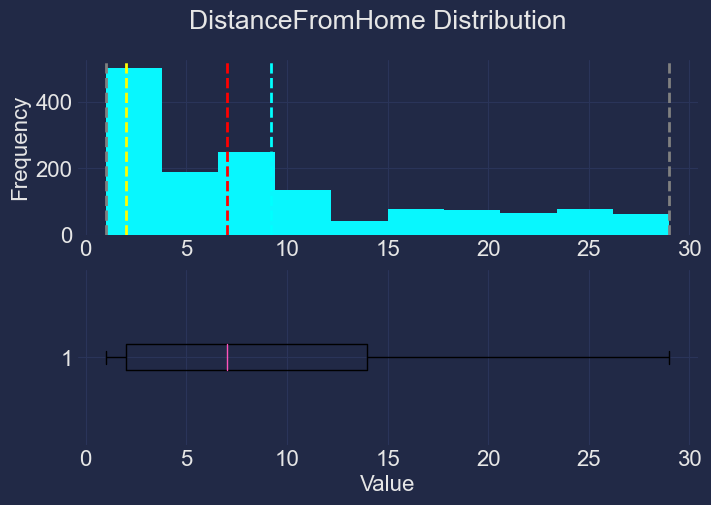

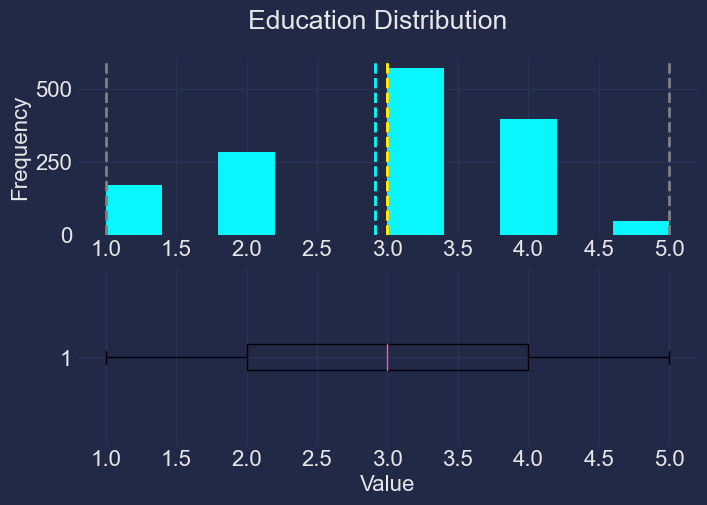

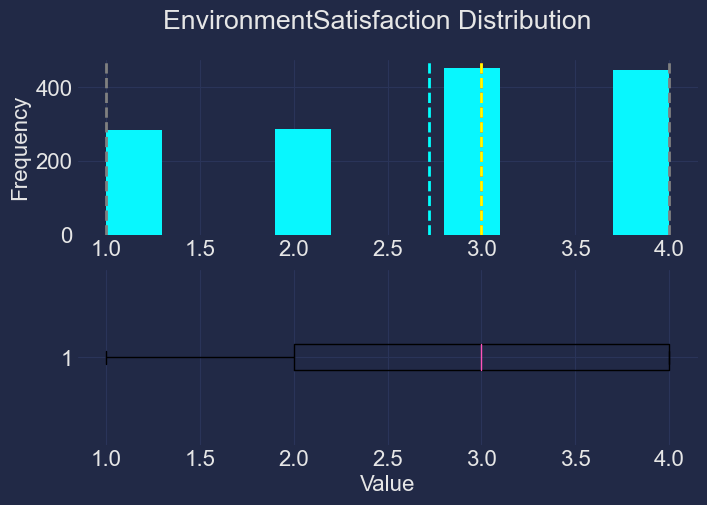

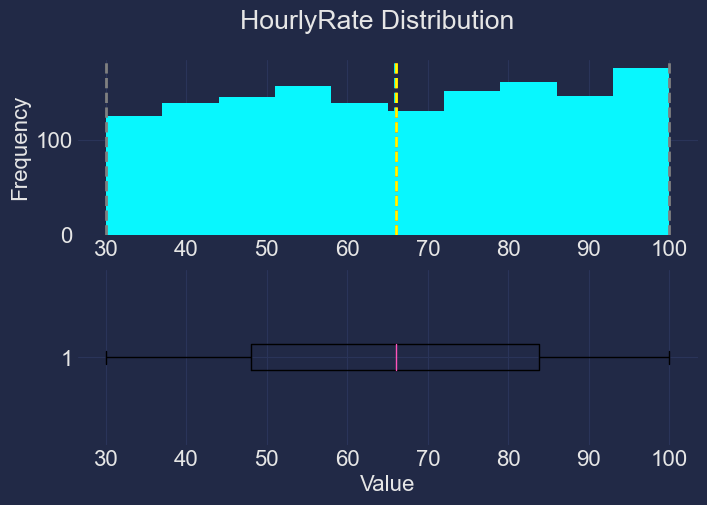

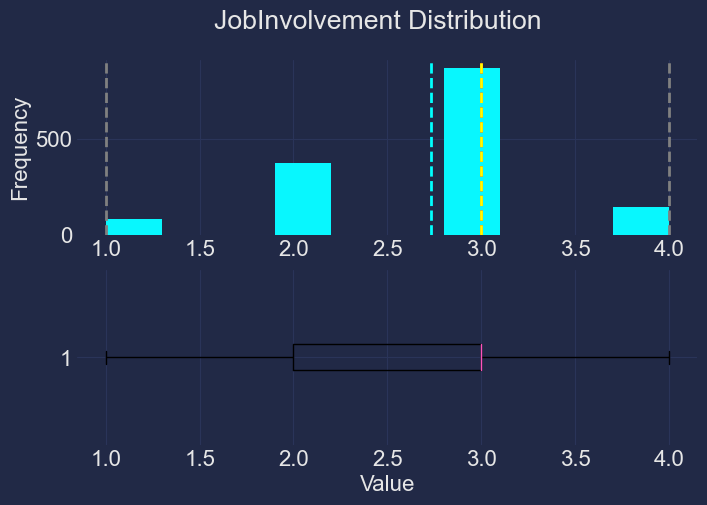

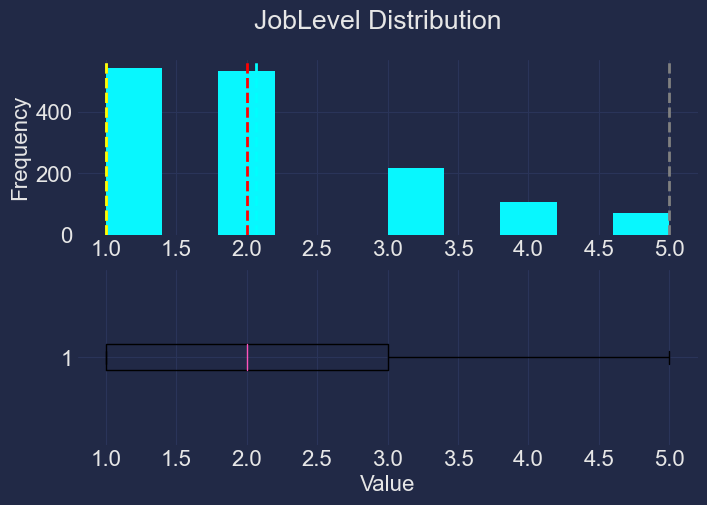

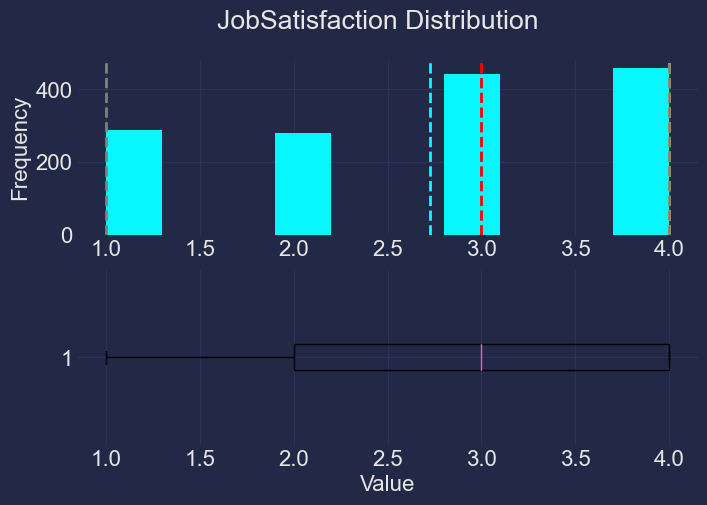

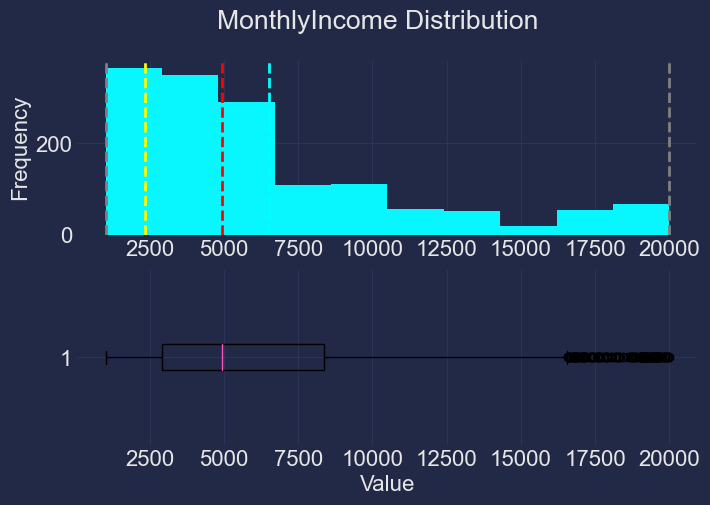

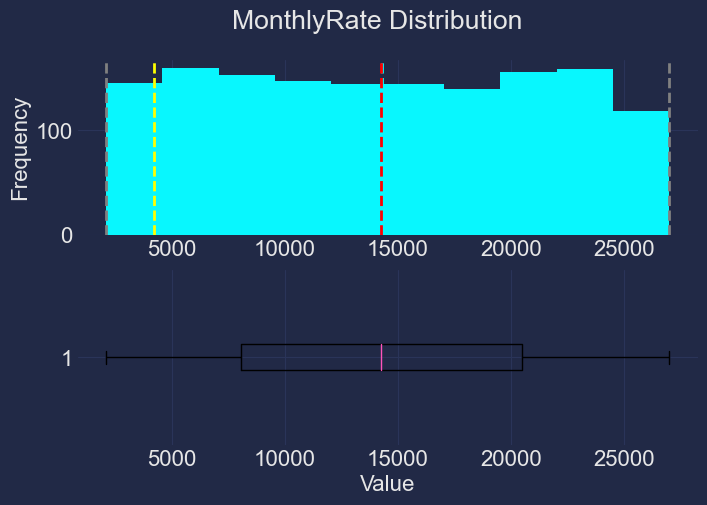

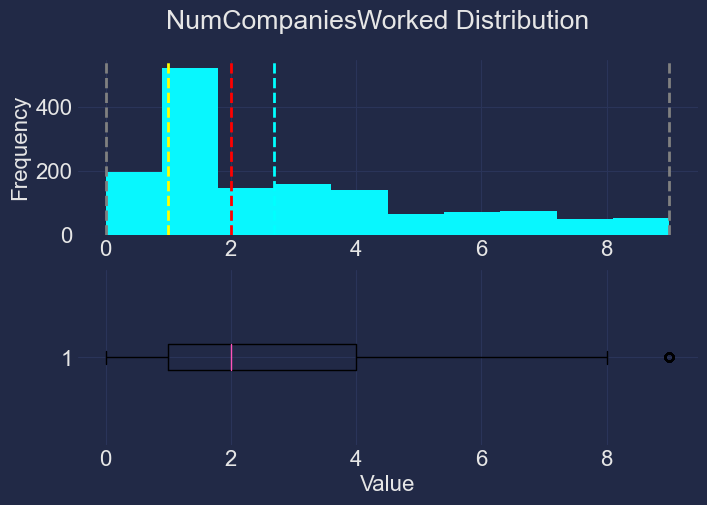

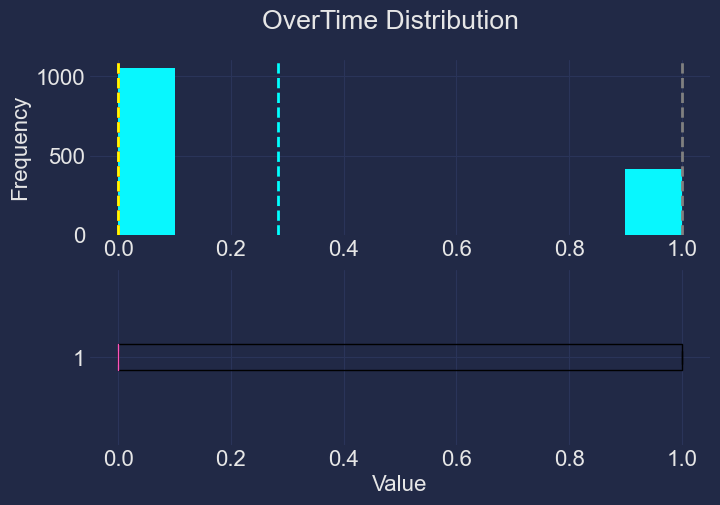

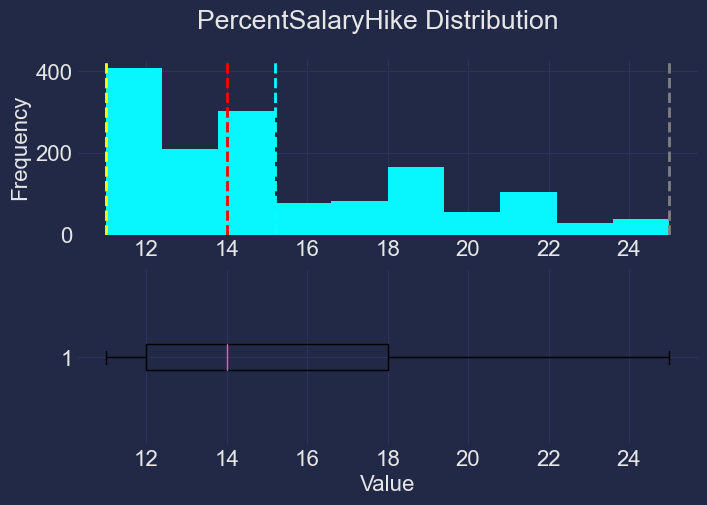

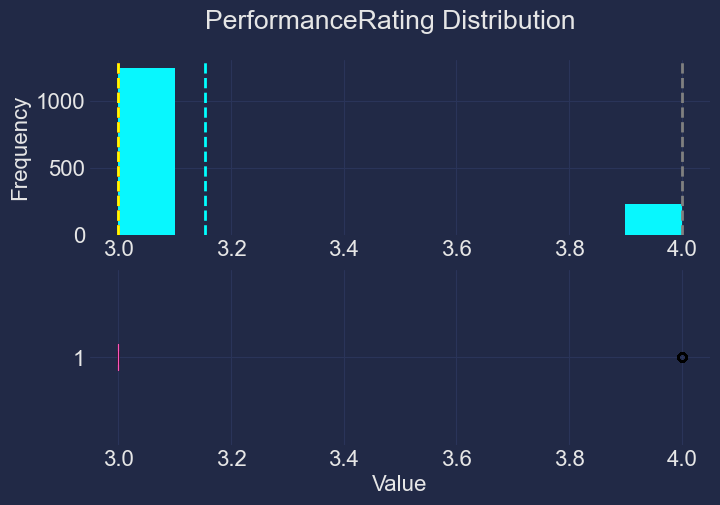

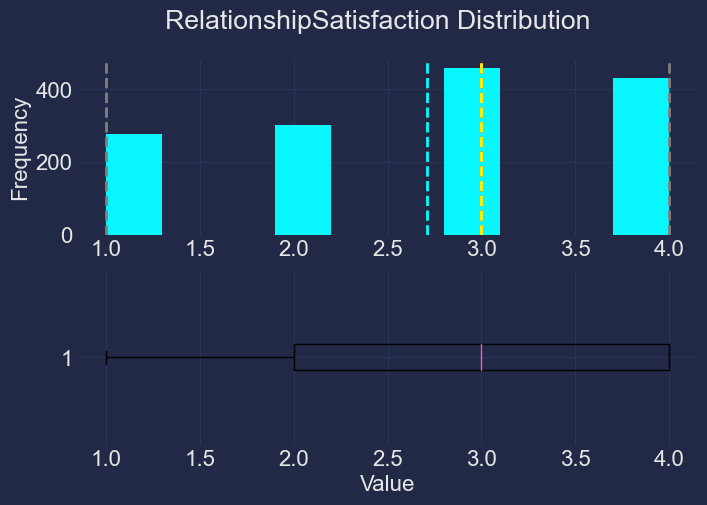

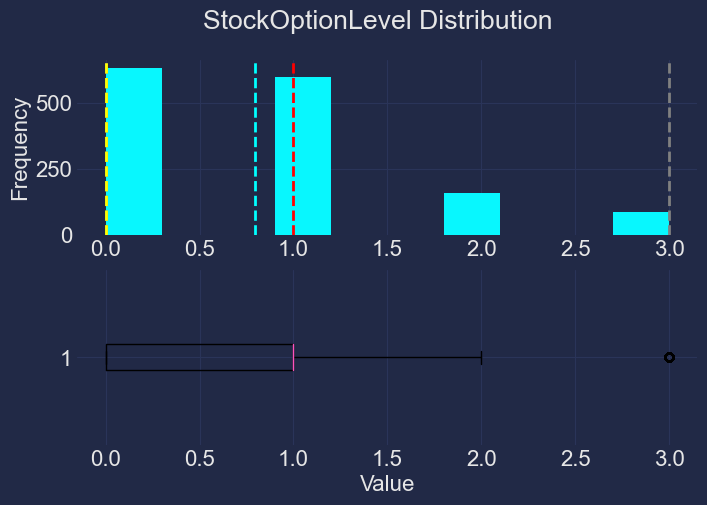

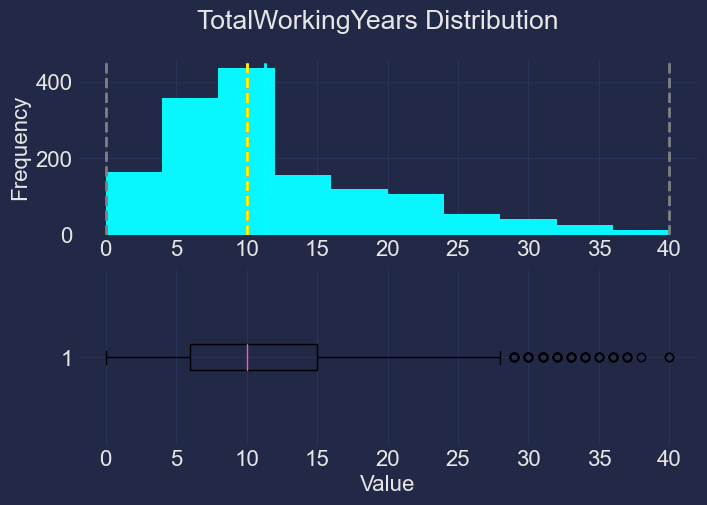

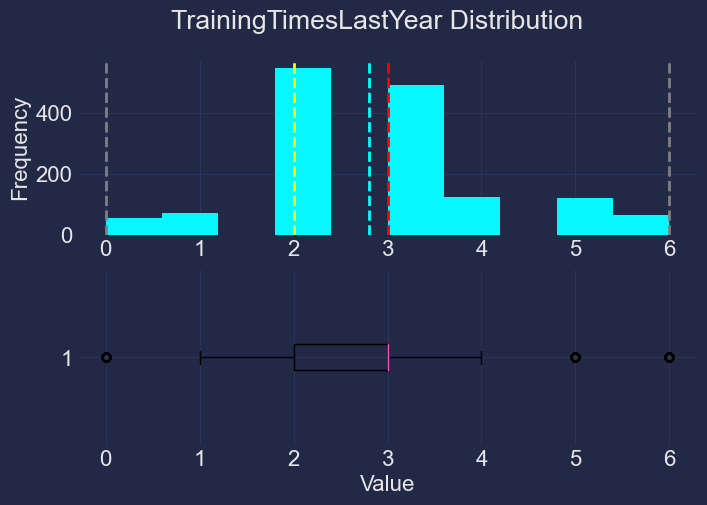

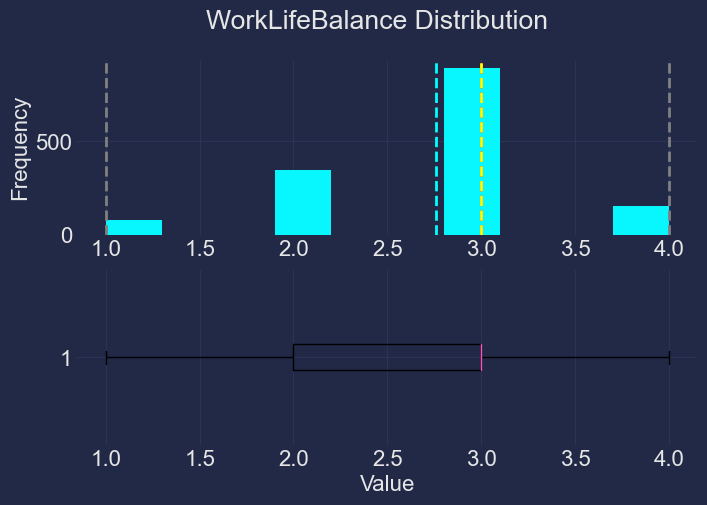

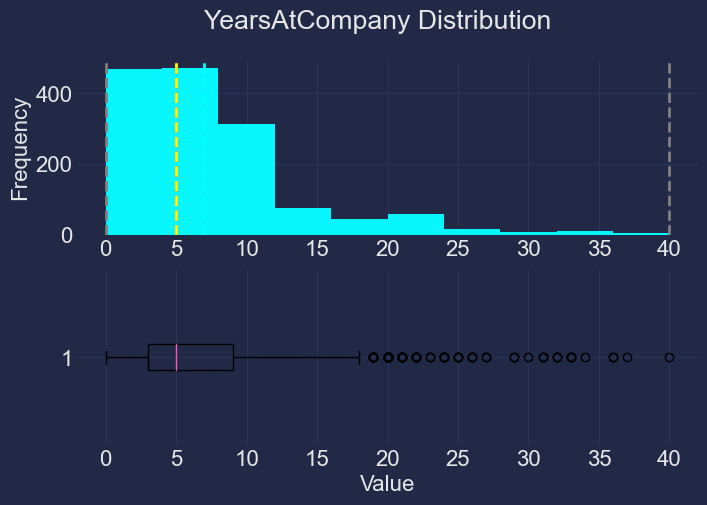

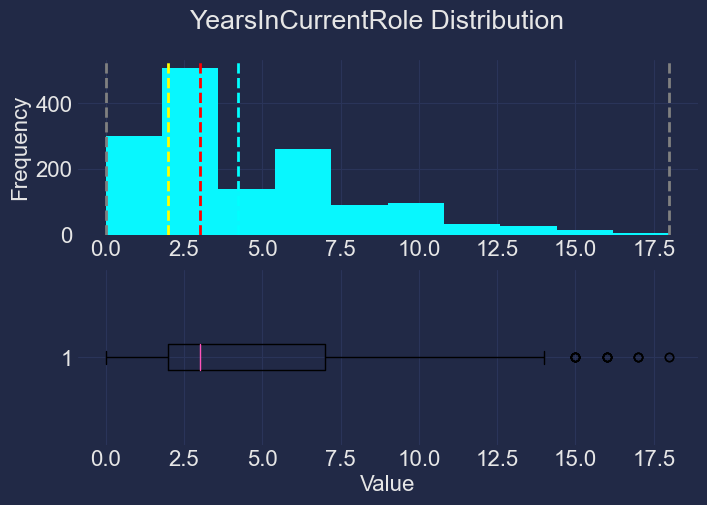

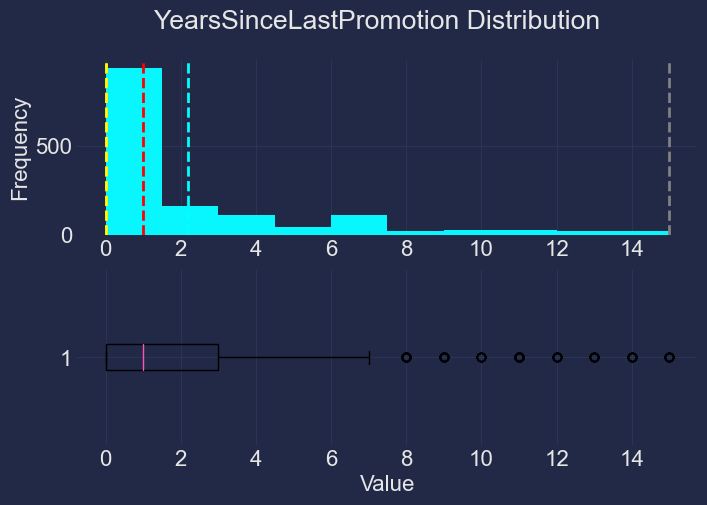

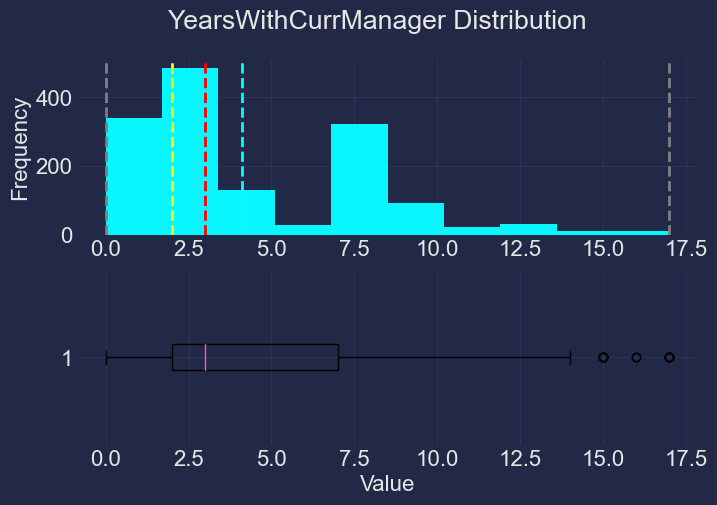

In [ ]:
import warnings
warnings.filterwarnings("ignore")

for col in num_features:
    show_distribution(df[f'{col}'],col)

### Analisis bivariado

In [ ]:
df["Attrition"].unique()

array([1, 0], dtype=int64)

<Axes: >

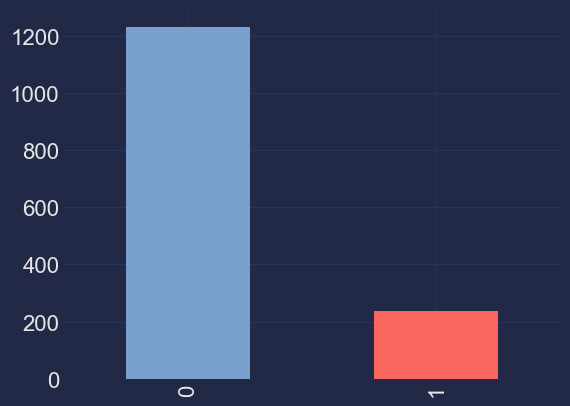

In [ ]:
df["Attrition"].value_counts().plot(kind="bar", color=["#799fcb","#f9665e"])


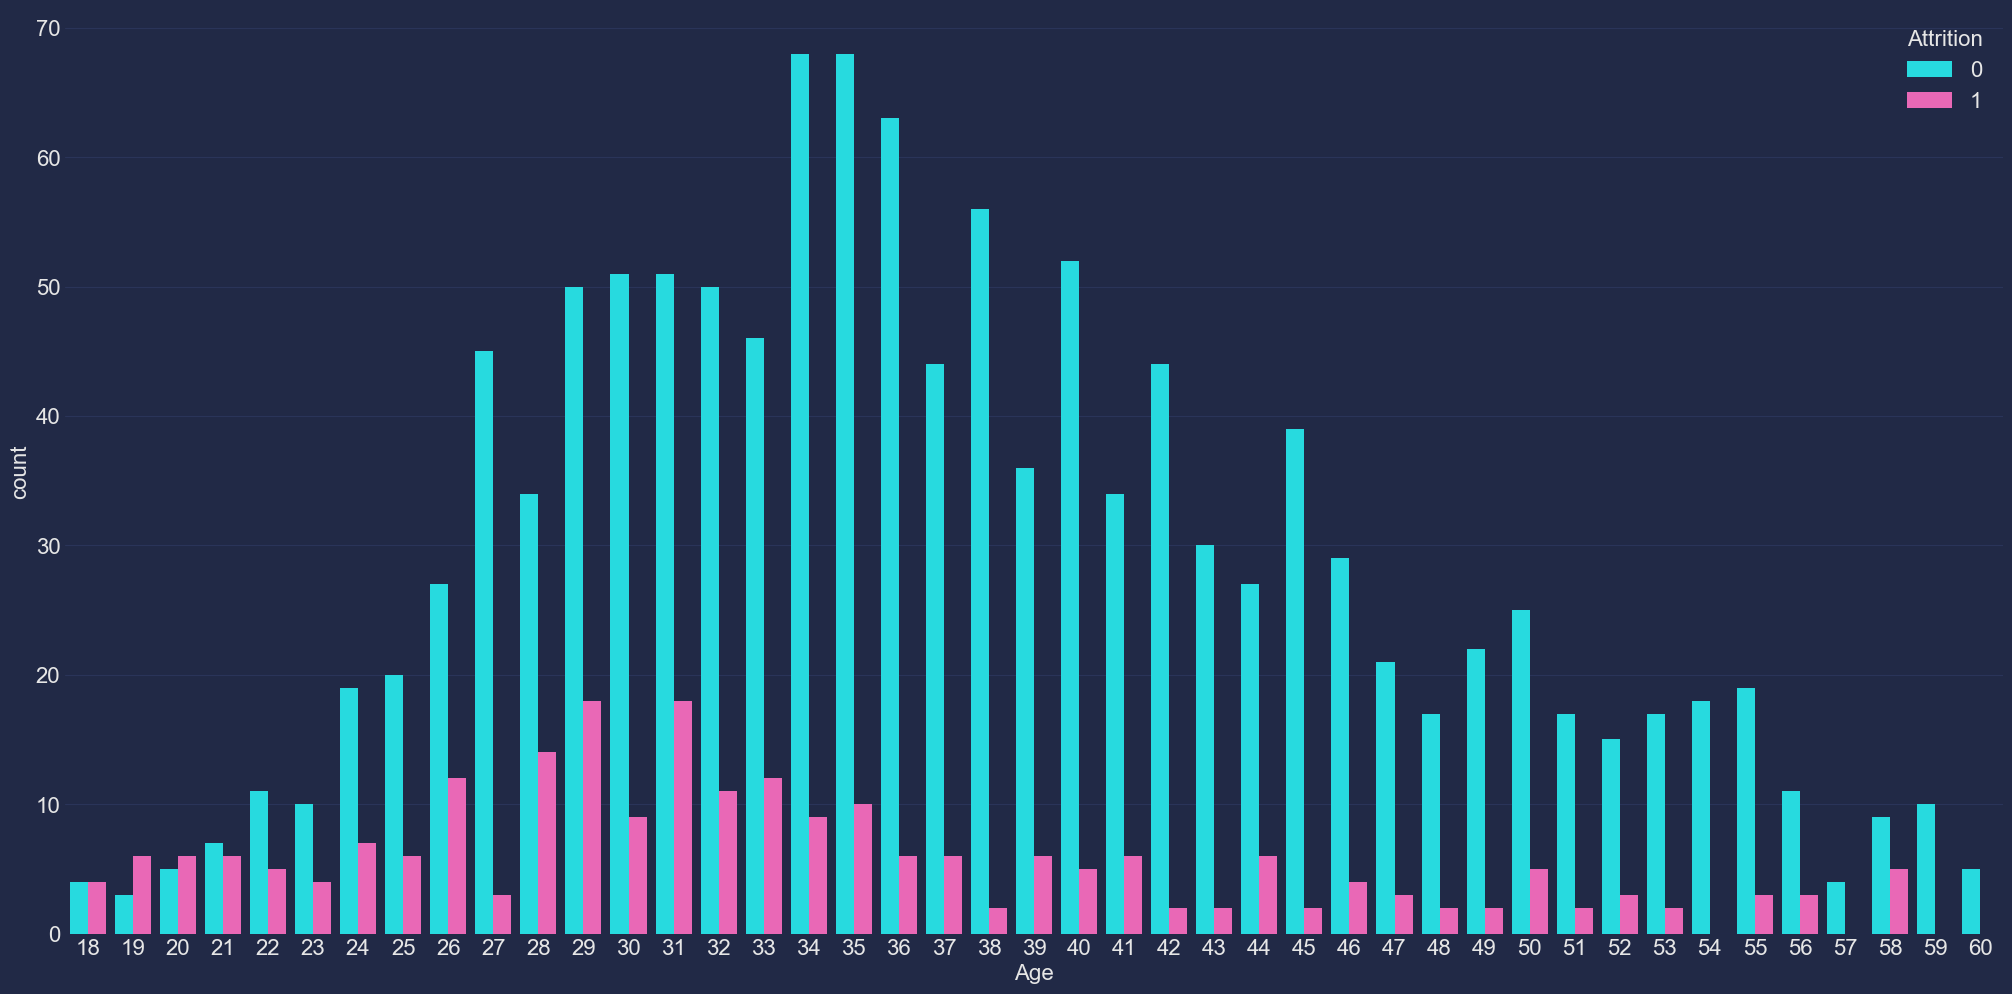

In [ ]:
plt.figure(figsize=(25,12))
sns.countplot(x="Age", hue='Attrition', data= df);

* Se observa que el mayor número de deserciones laborales se presenta en empleados con edades entre los 28 y 33 años.
* Aquellos empleados con mayor edad tienden a permanecer en la misma empresa por diversos factores, como estabilidad laboral, cargo, ingresos, entre otros.

In [ ]:
def plot_cat_vs_num(df, cat_name, num_col, hue=None, graph = None):                                                                                     
    # Attrition vs Age (Gender)
    f, ax = plt.subplots(1,1, figsize=(20,8))
    if hue is not None:
        if graph is not None:
            ax = sns.barplot(x = f'{cat_name}',y = f'{num_col}',
                             hue=f'{hue}', data=df, palette='husl')
        else: 
            ax = sns.boxplot(x = f'{cat_name}', y = f'{num_col}',
                        hue=f'{hue}', data=df,palette='husl')
    else:
        ax = sns.boxplot(x = f'{cat_name}', y = f'{num_col}', data=df, palette='husl')

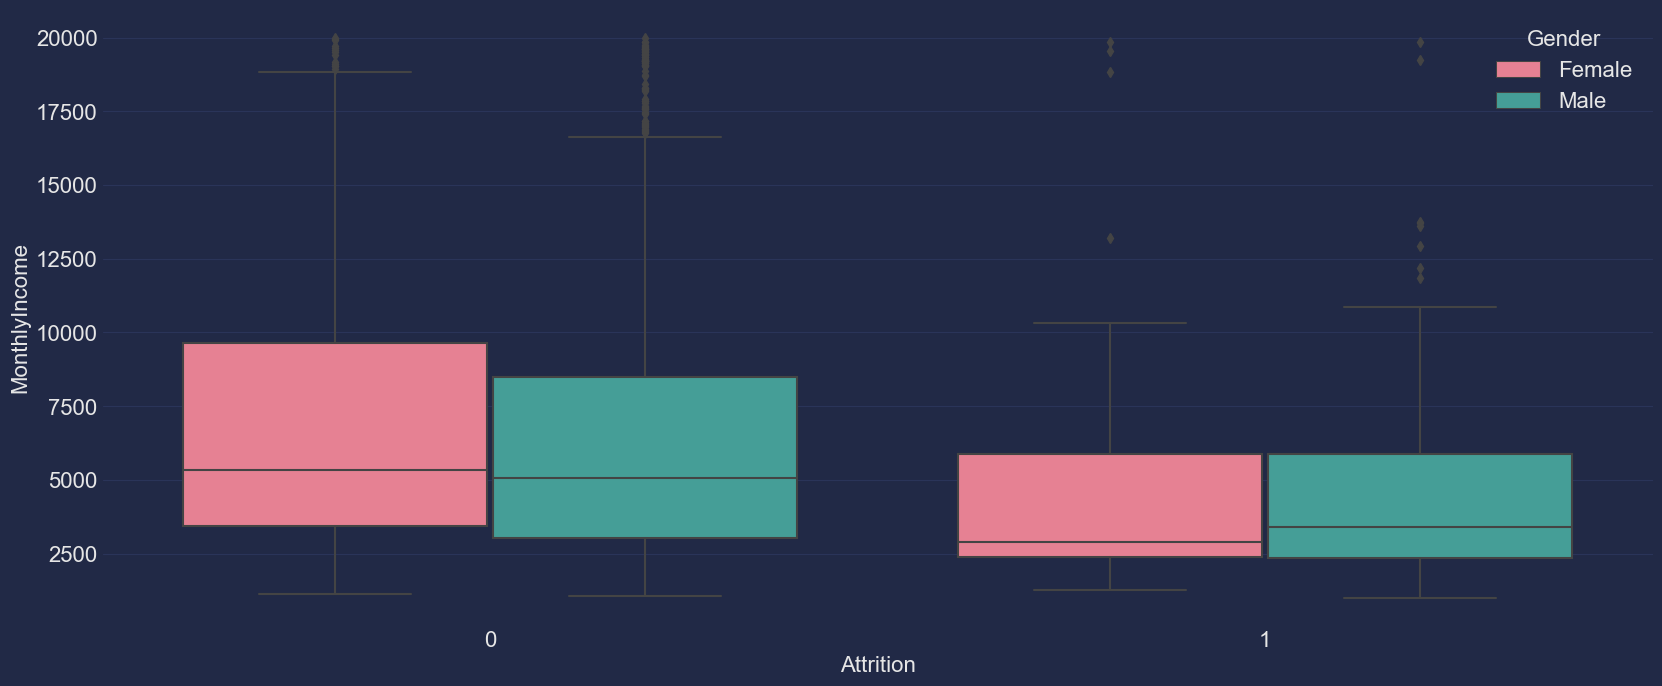

In [ ]:
plot_cat_vs_num(df,"Attrition","MonthlyIncome","Gender")

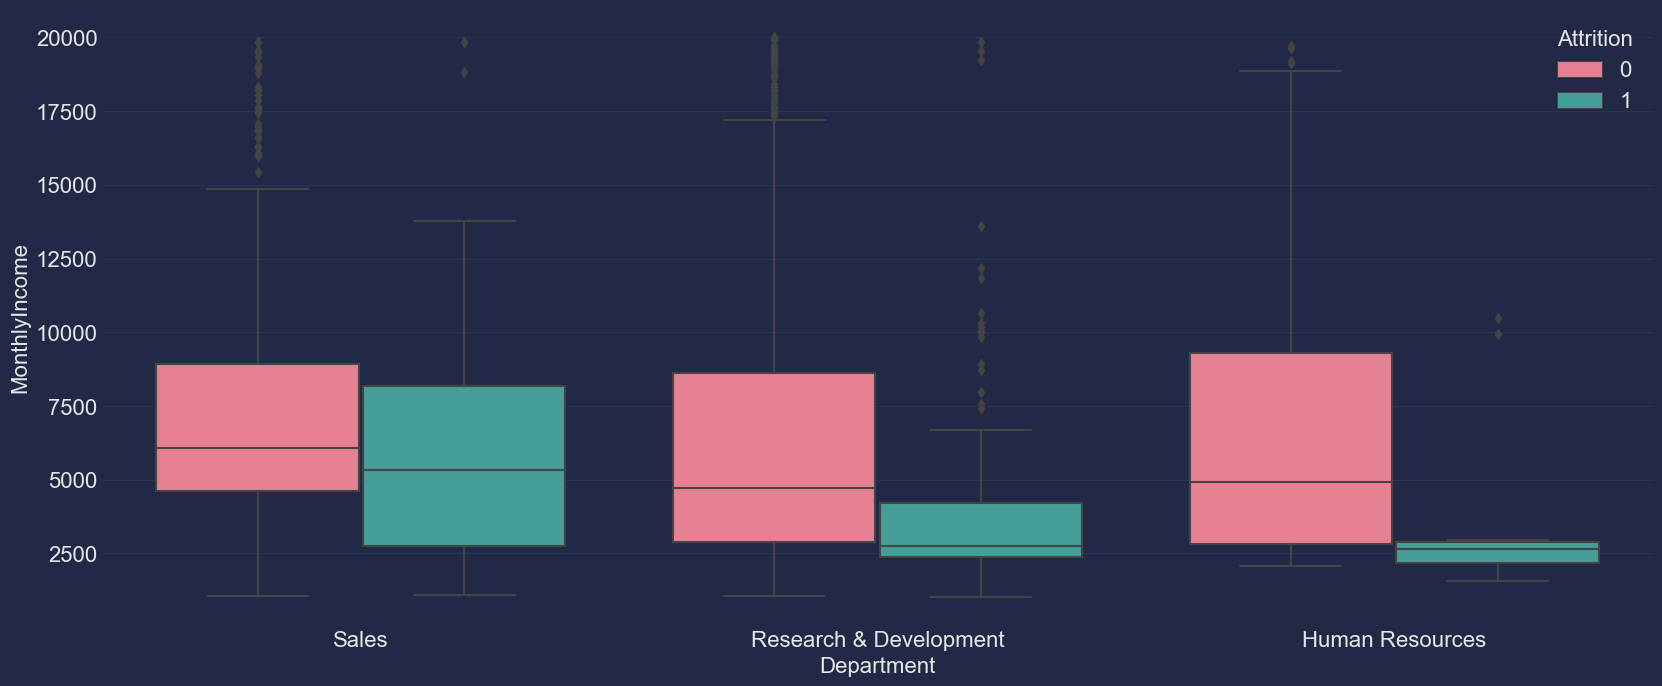

In [ ]:
plot_cat_vs_num(df,"Department","MonthlyIncome","Attrition")

* Aquellas personas con bajos ingresos mensuales tienden a desertar laboralmente.

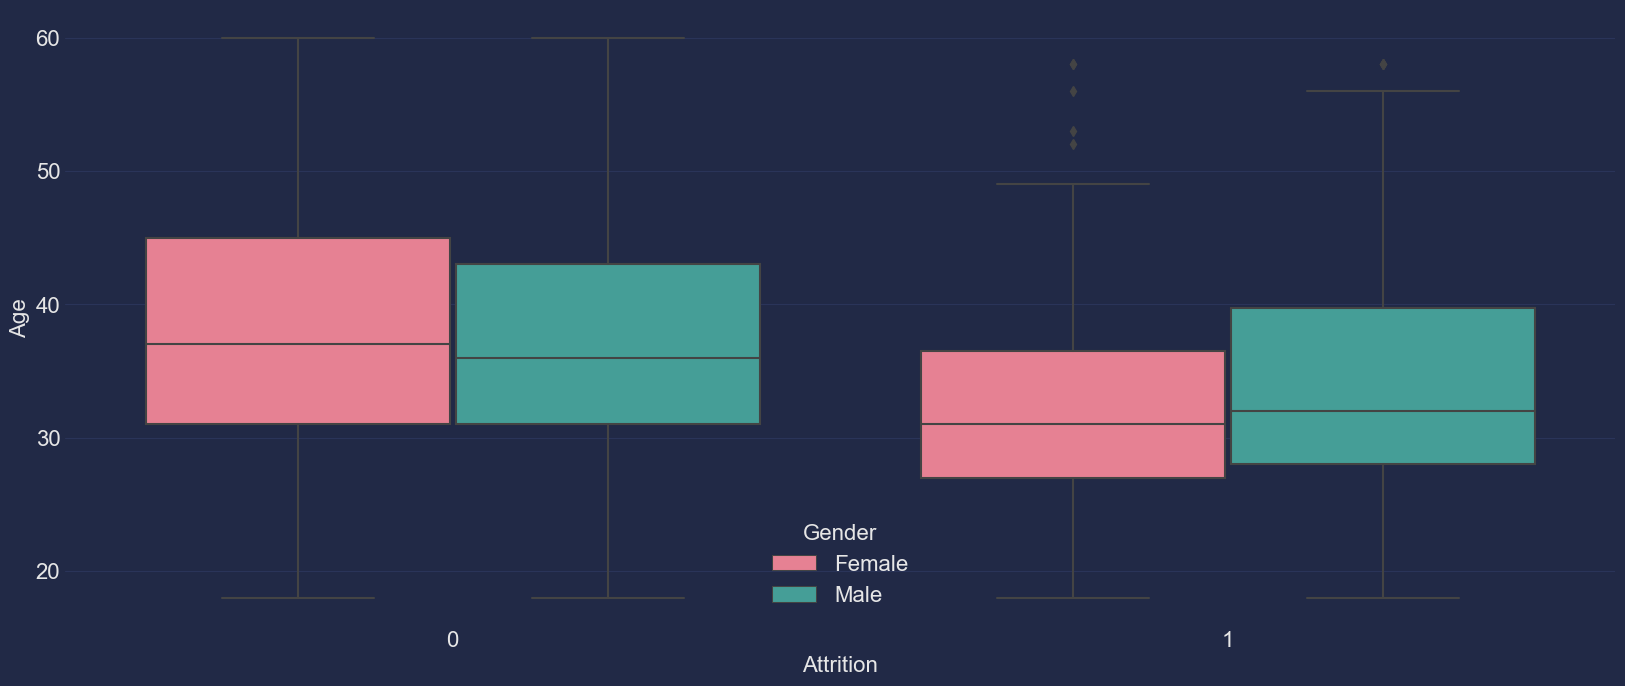

In [ ]:
plot_cat_vs_num(df,"Attrition","Age","Gender")

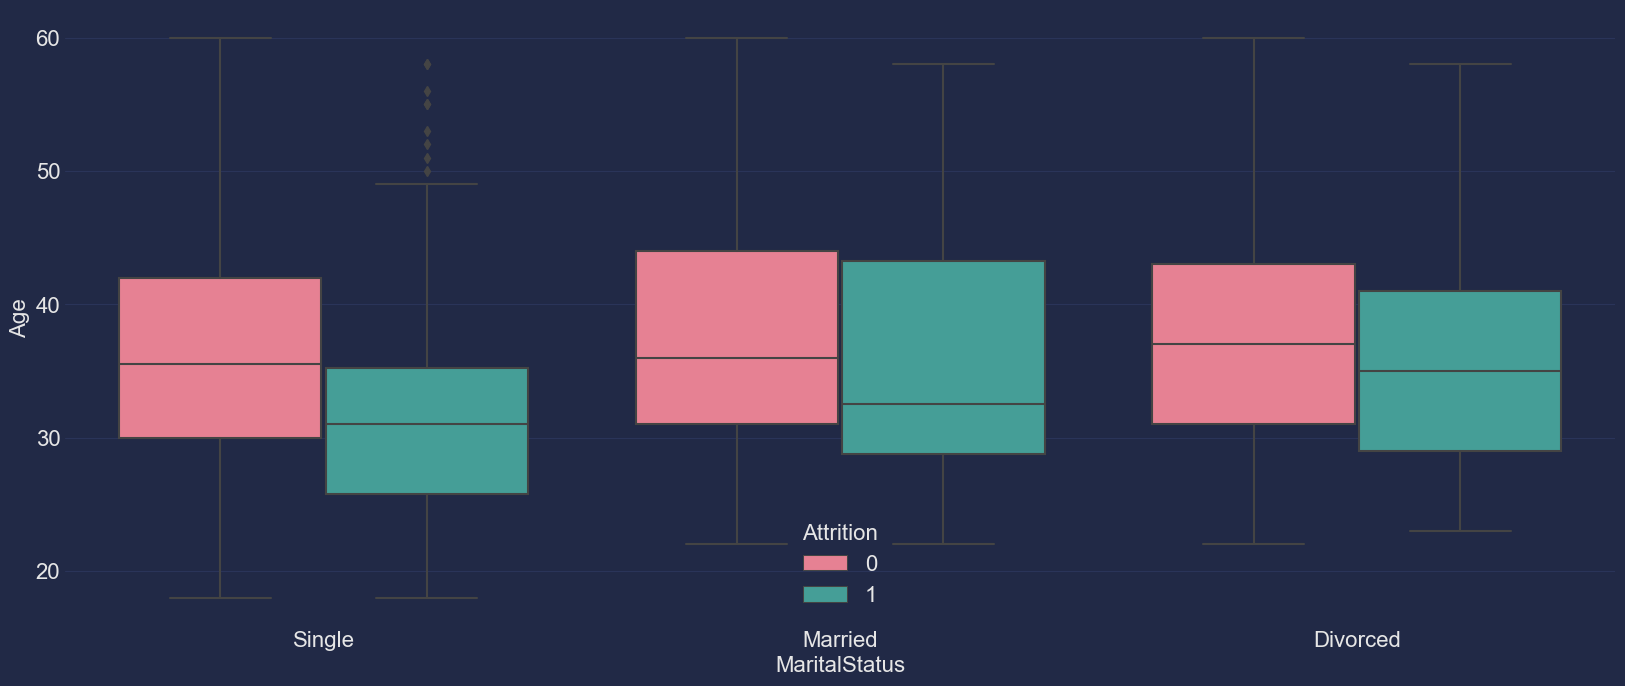

In [ ]:
plot_cat_vs_num(df,"MaritalStatus","Age","Attrition") 

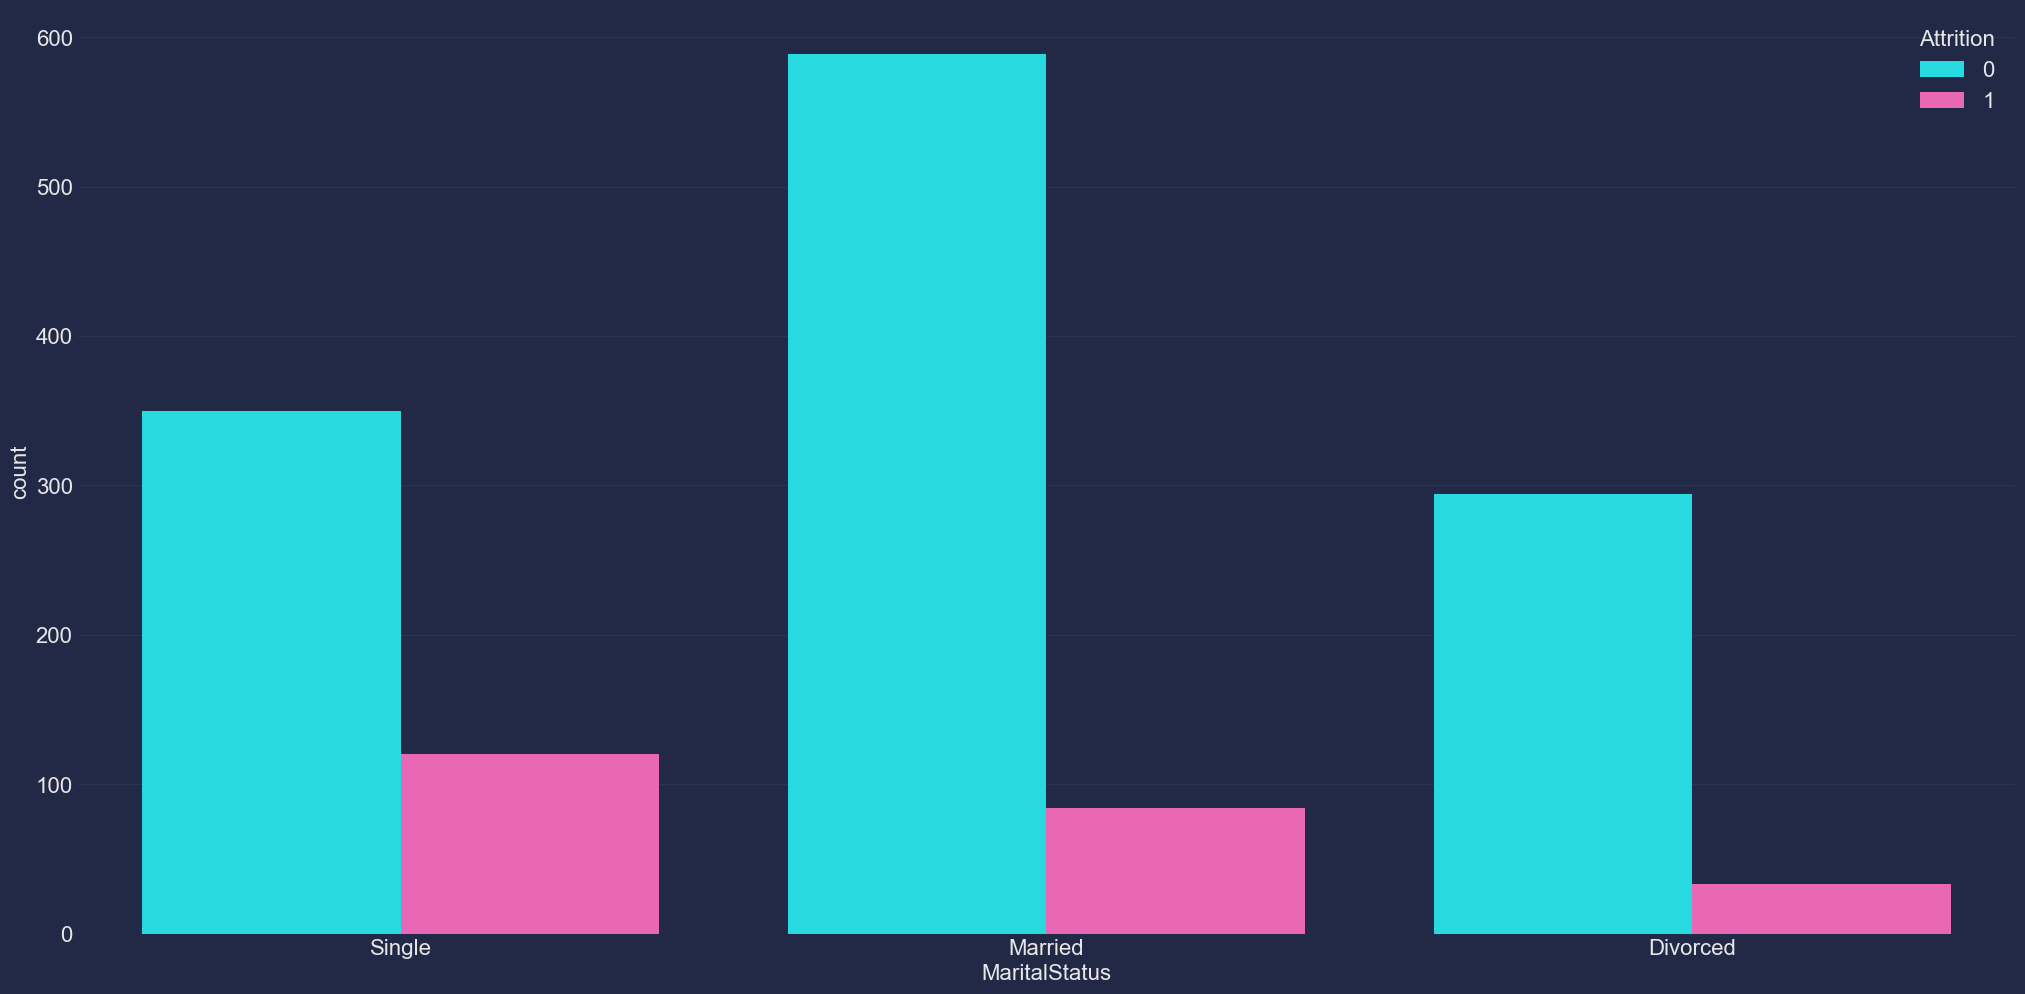

In [ ]:
plt.figure(figsize=(25,12))
sns.countplot(x="MaritalStatus", hue='Attrition', data= df);

* Las personas solteras tienden a desertar laboralmente, por posibles factores como, mejores oportunidades, salario, viaje, entre otros.

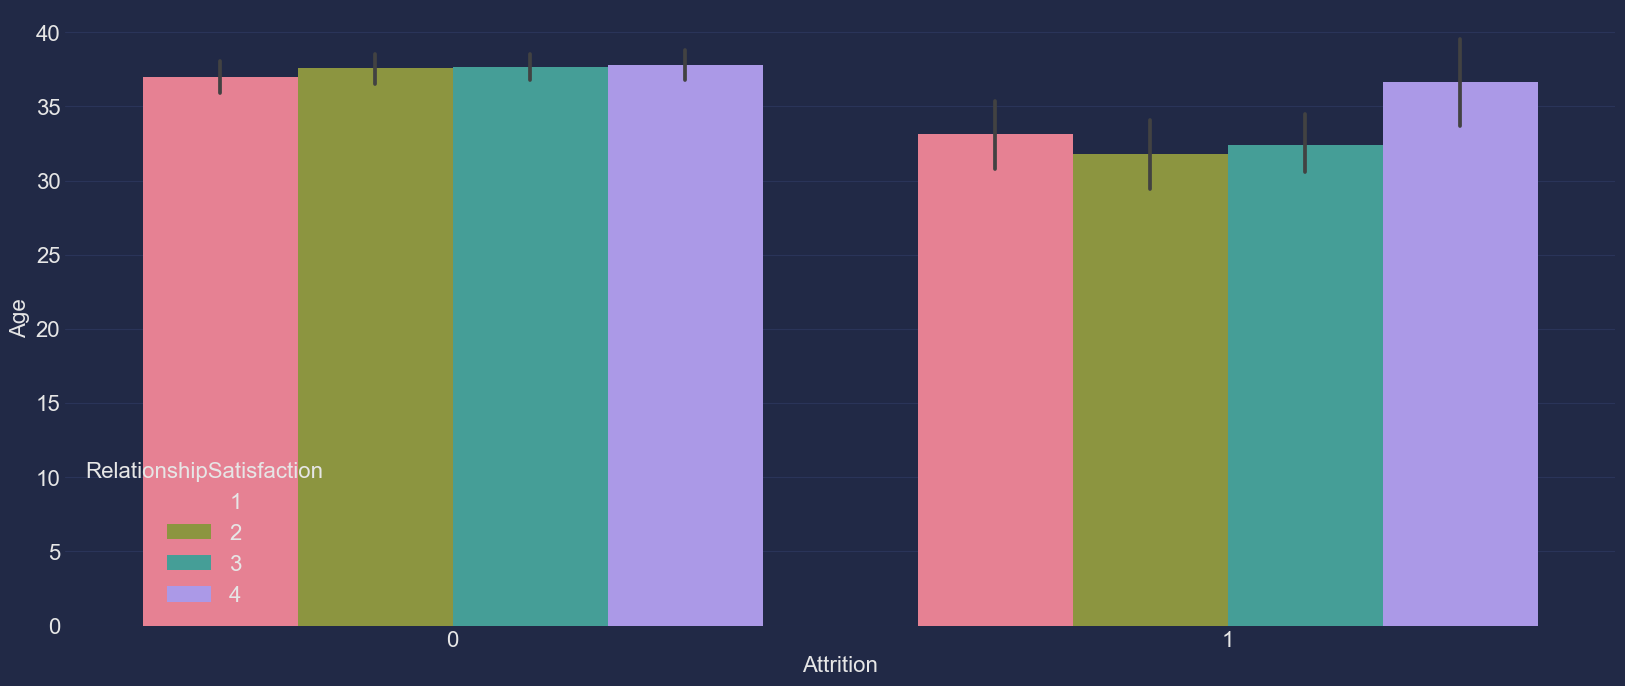

In [ ]:
plot_cat_vs_num(df,"Attrition","Age","RelationshipSatisfaction","H") 

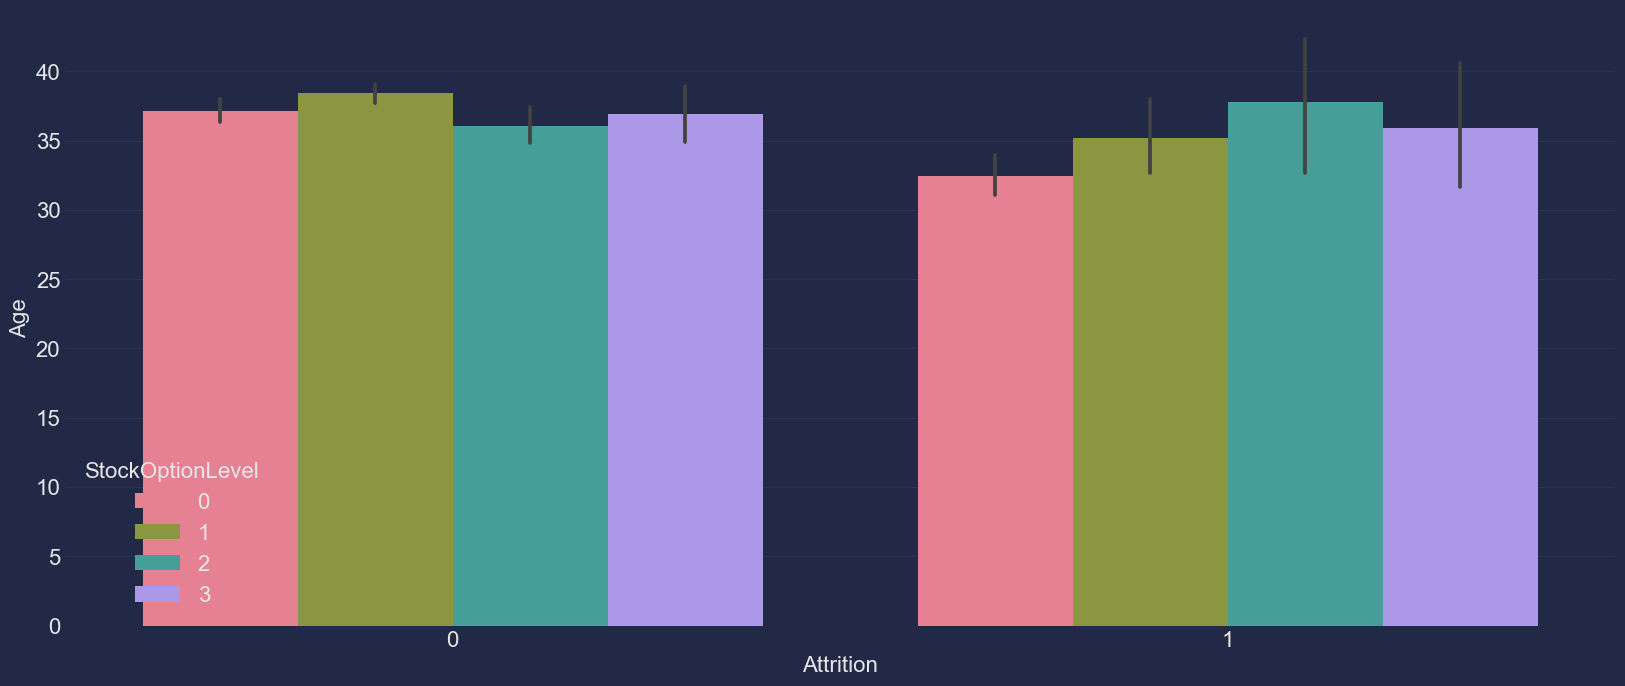

In [ ]:
plot_cat_vs_num(df,"Attrition","Age","StockOptionLevel","H") 

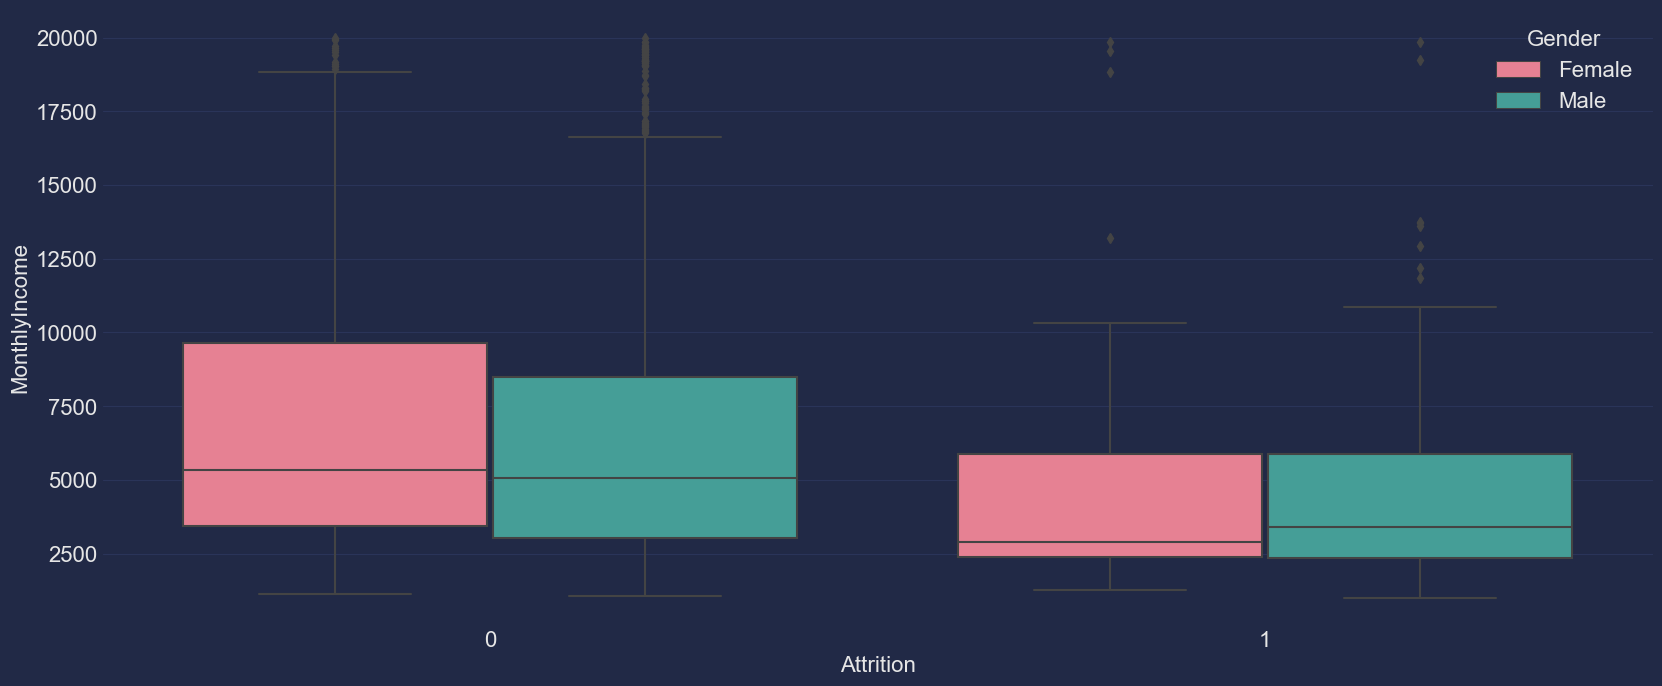

In [ ]:
plot_cat_vs_num(df,"Attrition","MonthlyIncome","Gender")

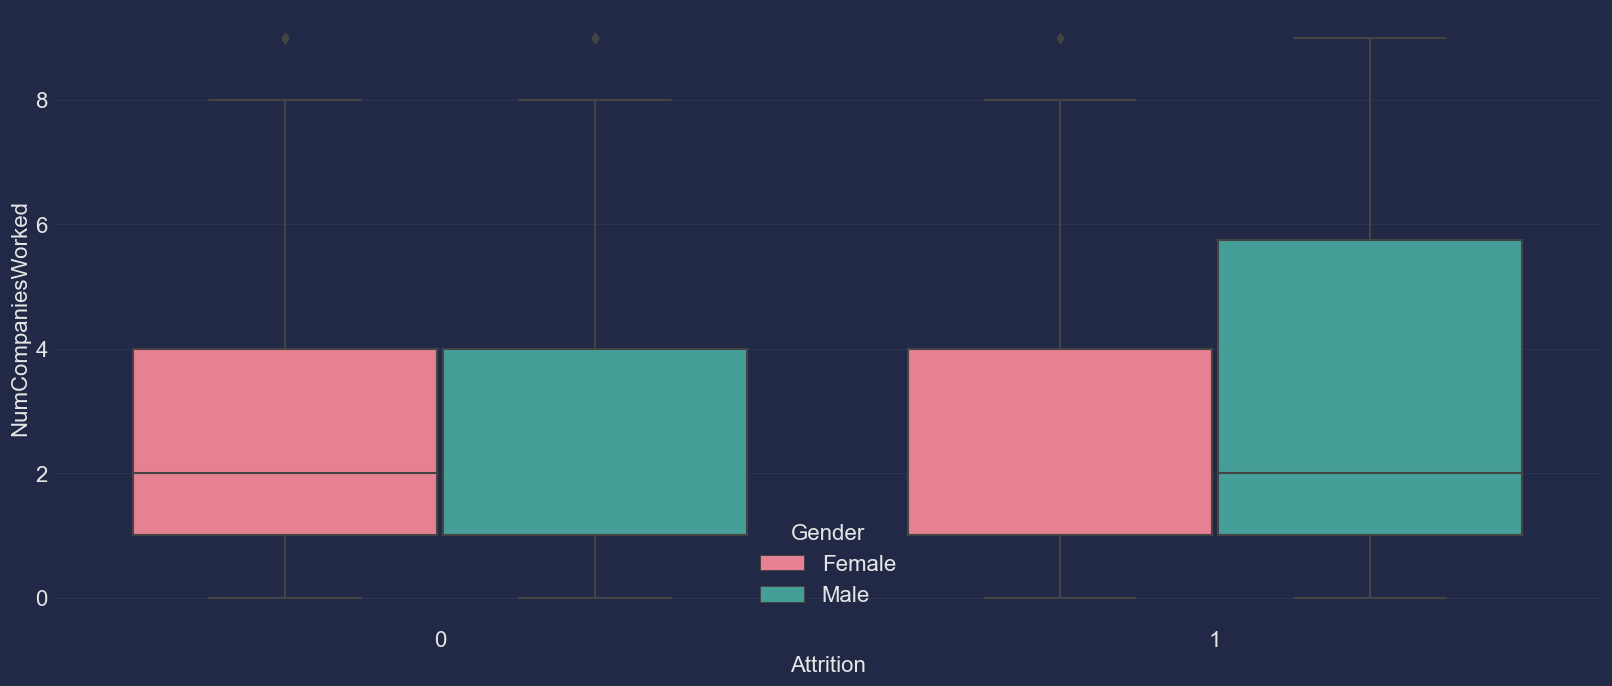

In [ ]:
plot_cat_vs_num(df,"Attrition","NumCompaniesWorked","Gender")

* Se observa que los varones que han estado trabajando en varias empresas tienden a desertar laboralmente.

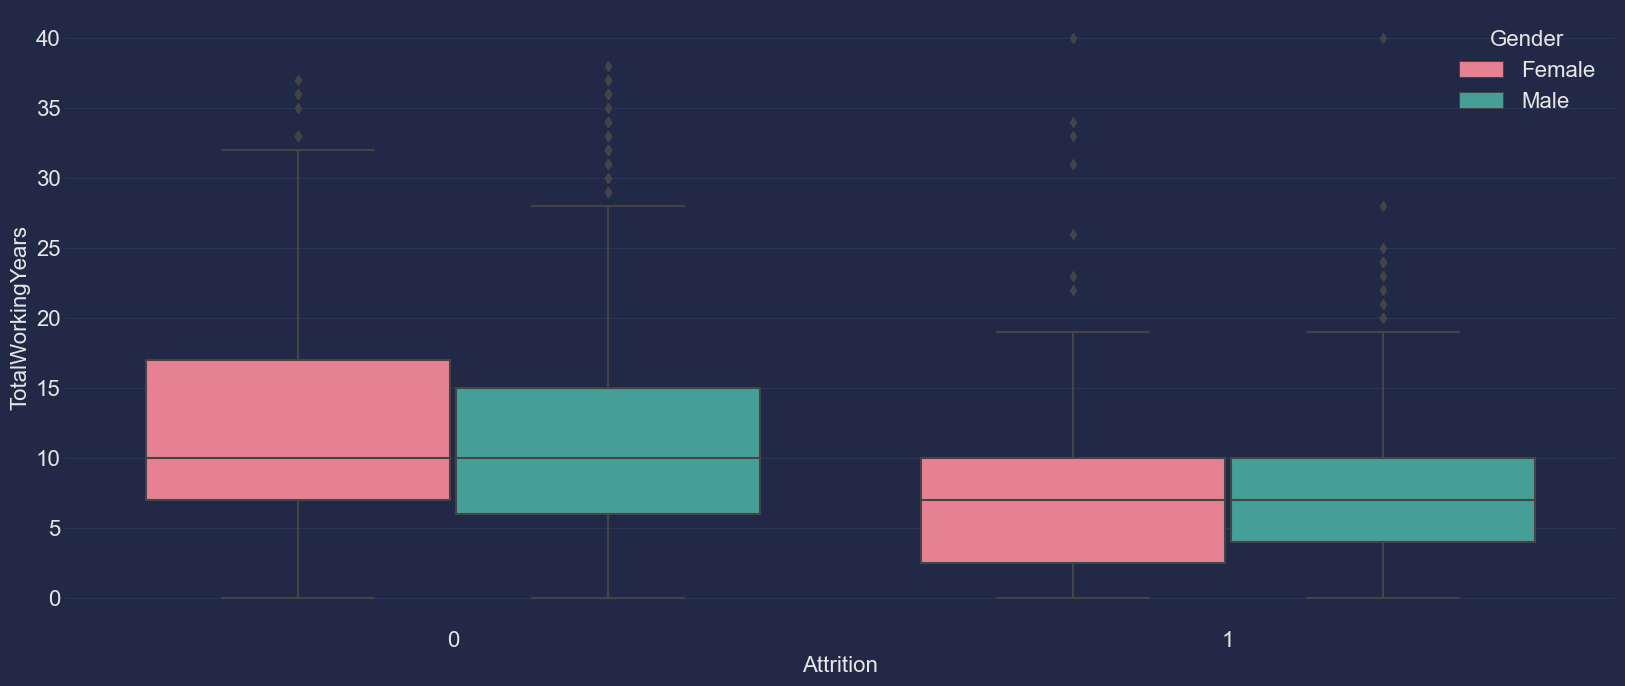

In [ ]:
plot_cat_vs_num(df,"Attrition","TotalWorkingYears","Gender")

* Aquellas personas con pocos años de experiencia son las personas que tienden a desertar laboralmente.

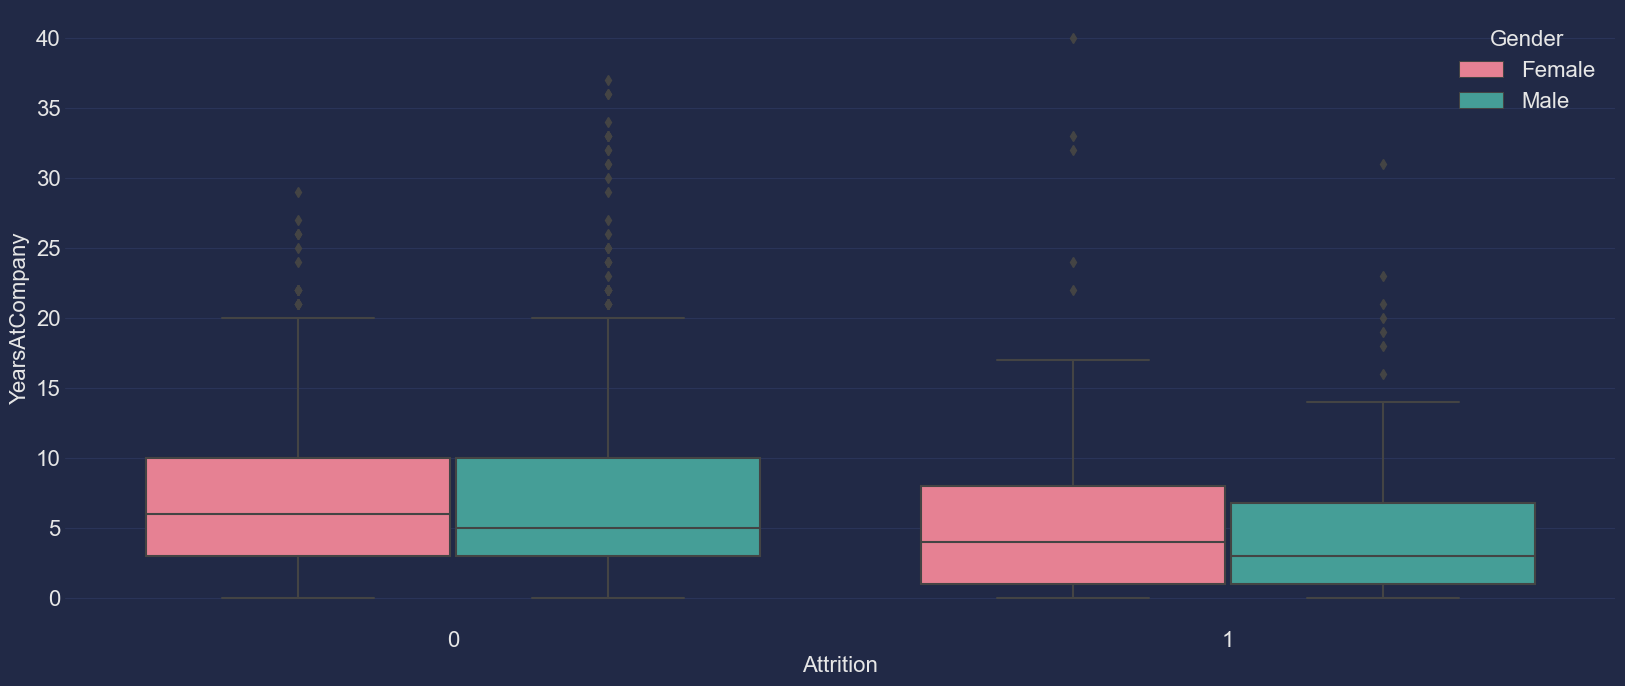

In [ ]:
plot_cat_vs_num(df,"Attrition","YearsAtCompany","Gender")

* Las personas que llevan poco tiempo trabajando en la empresa tienden a desertar laboralmente.

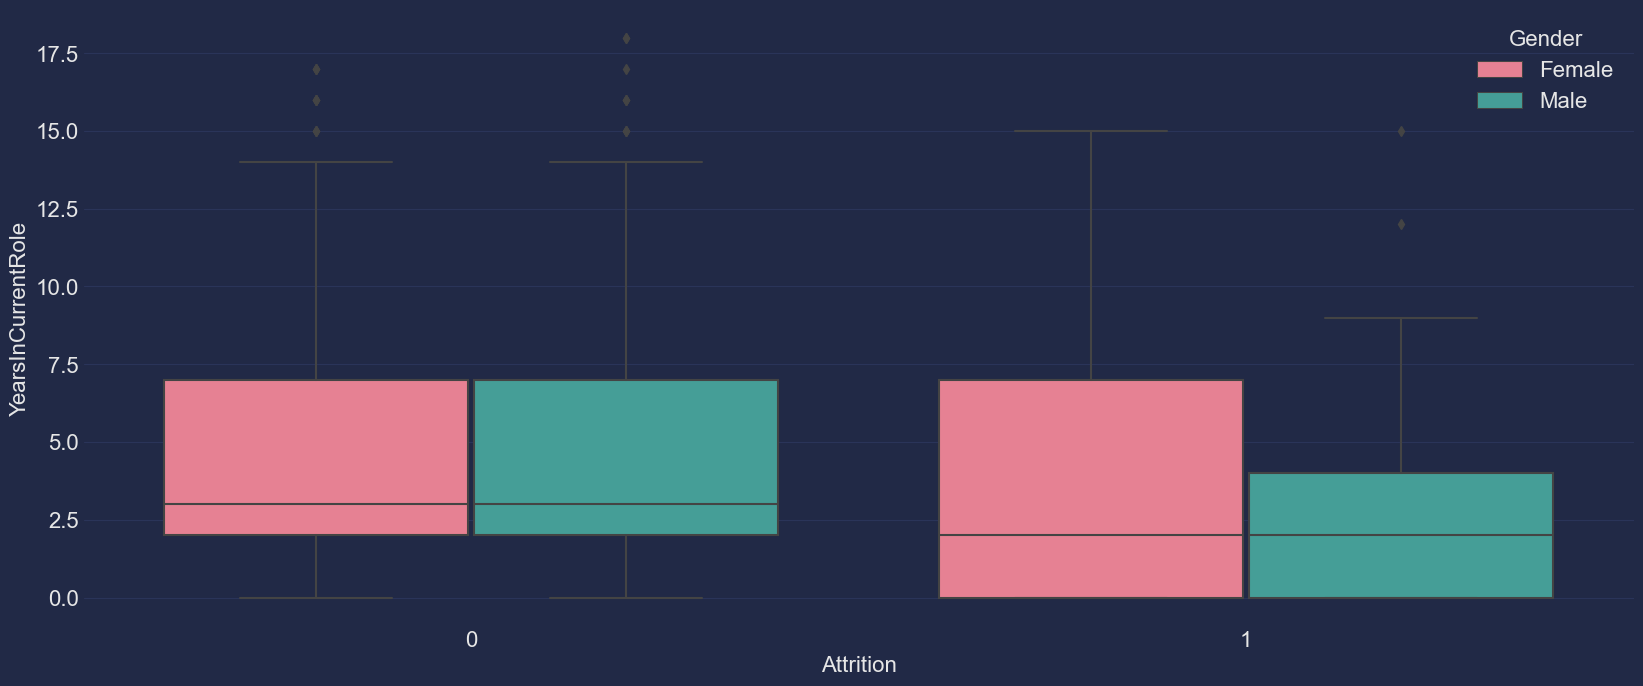

In [ ]:
plot_cat_vs_num(df,"Attrition","YearsInCurrentRole","Gender")

* Las personas con sus cargos actuales tienden a desertar

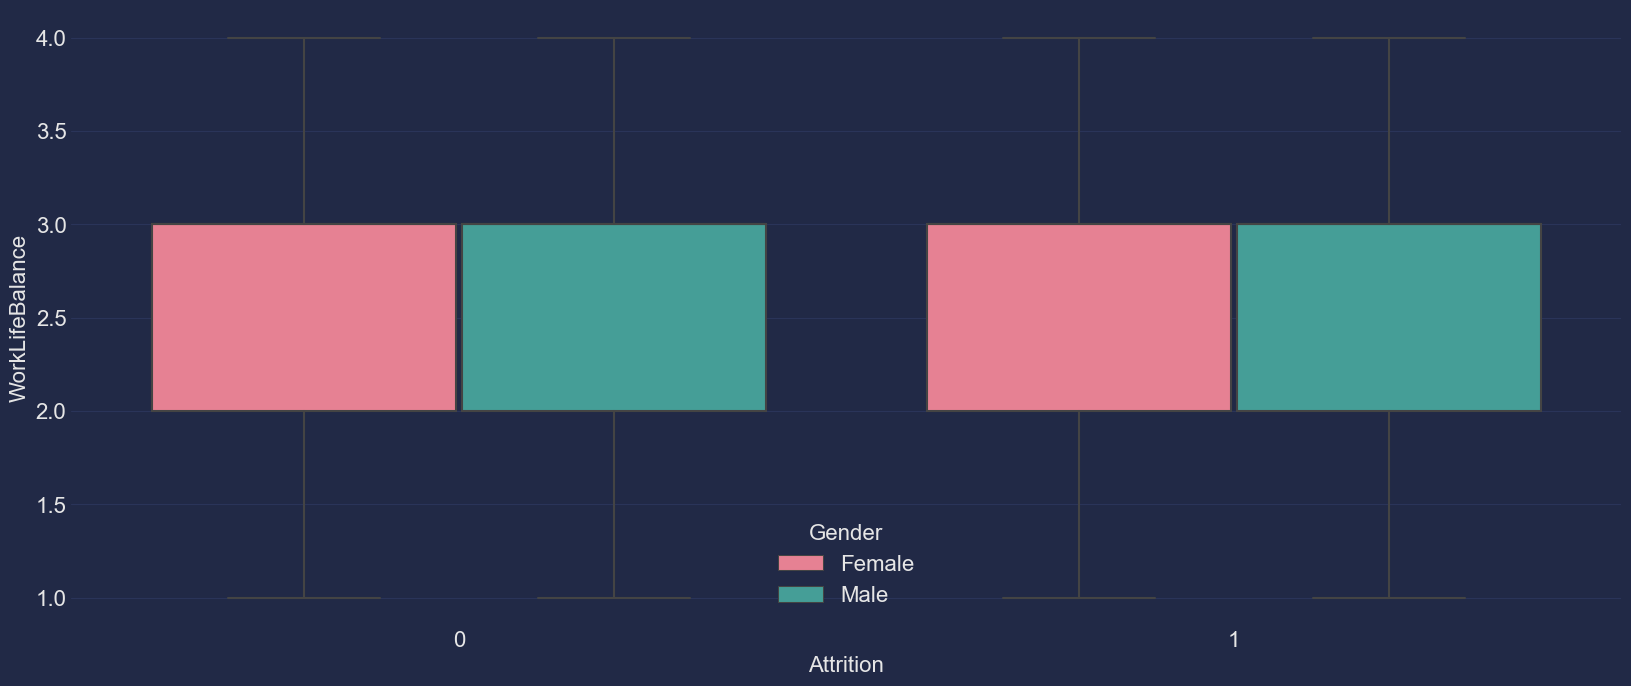

In [ ]:
plot_cat_vs_num(df,"Attrition","WorkLifeBalance","Gender")

* Indica que el balance laboral entre el trabajo y la vida cotidiana no influye

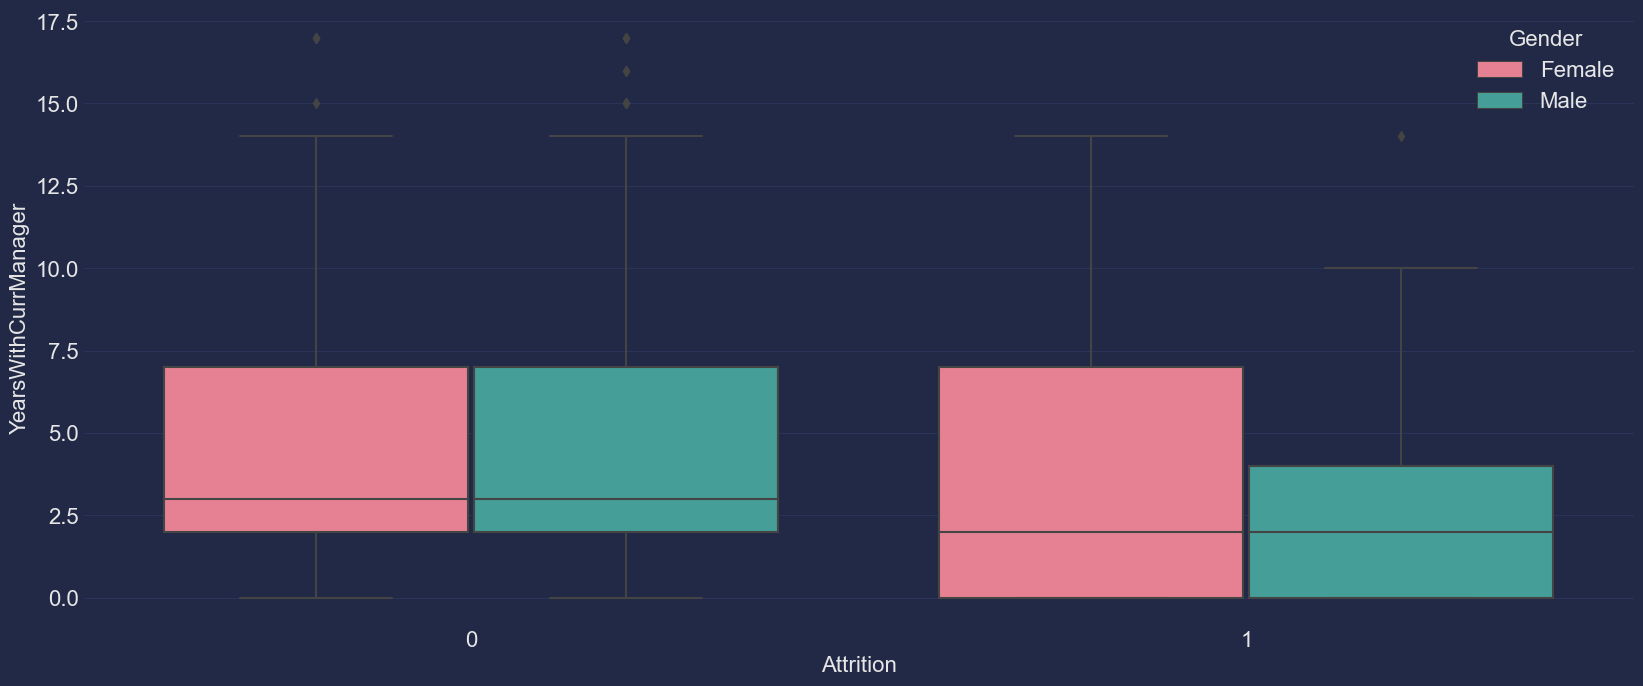

In [ ]:
plot_cat_vs_num(df,"Attrition","YearsWithCurrManager","Gender")

* tienden a abandonar aquellas personas que recientemente estan trabajando con sus nuevos jefes.

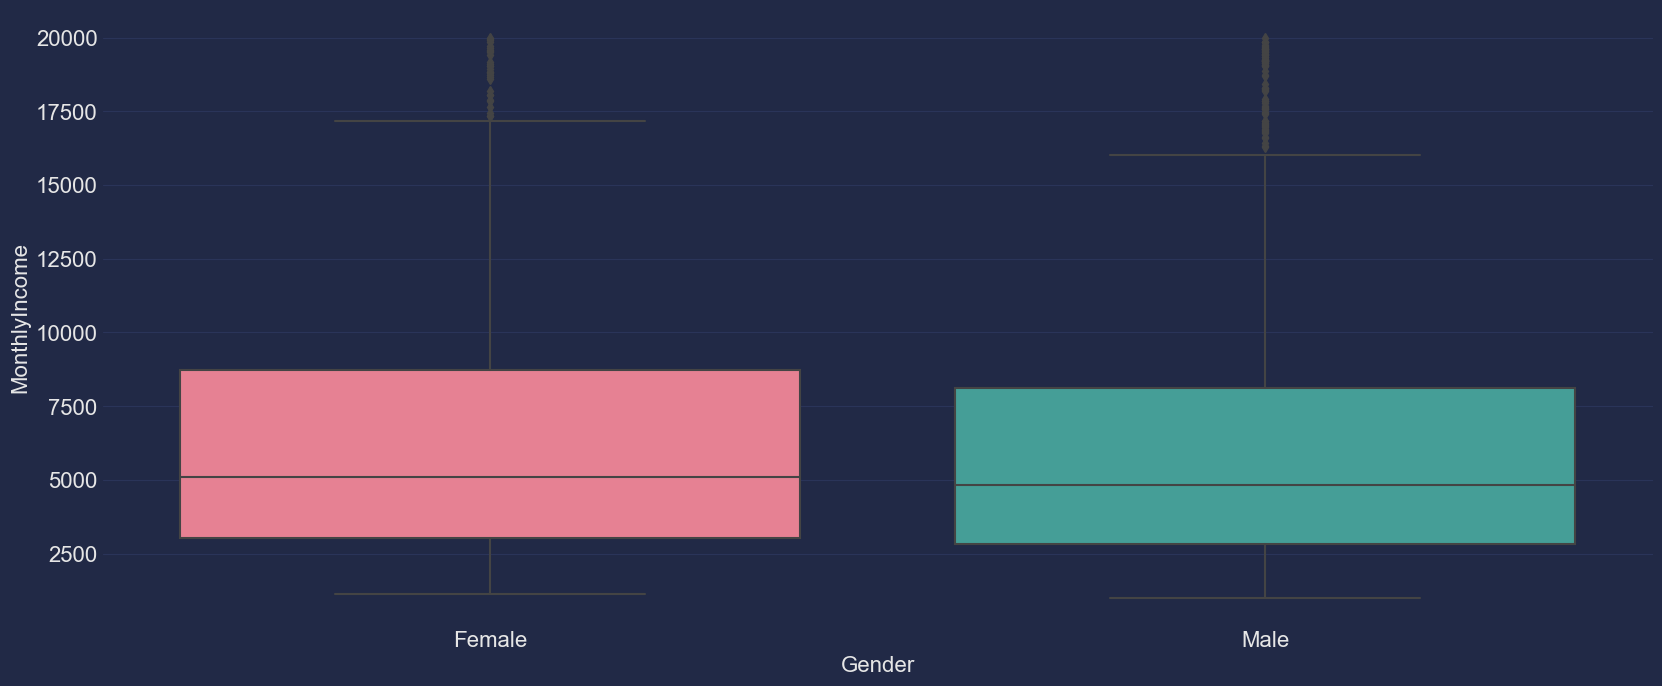

In [ ]:
plot_cat_vs_num(df,"Gender","MonthlyIncome")

* Se observa que tienden a tener ingresos similares, incluso se observa que el tercer cuartil esta por encima que el de los varones.

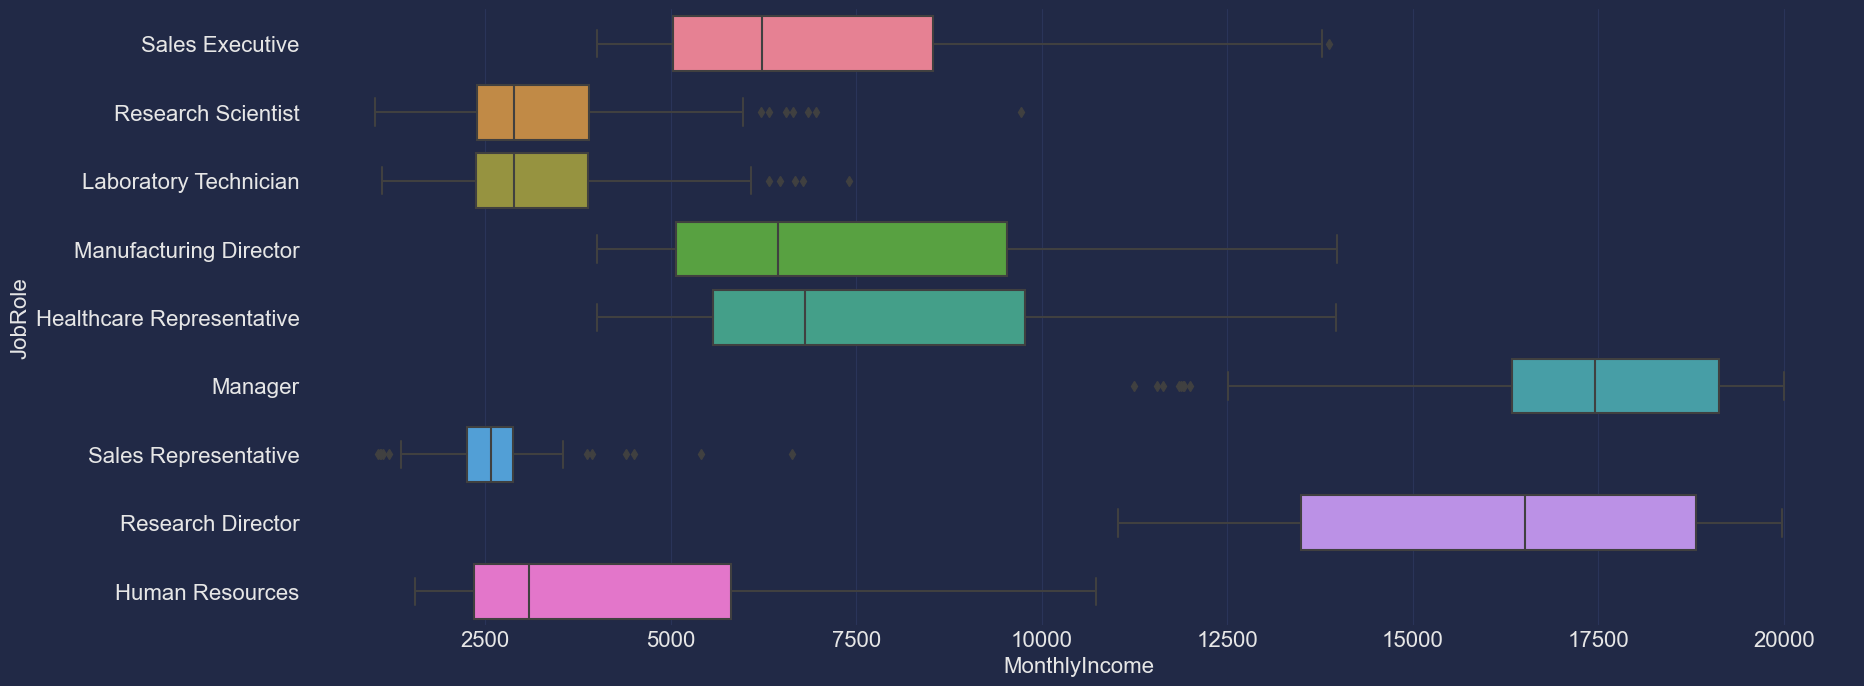

In [ ]:
plot_cat_vs_num(df,"MonthlyIncome","JobRole")

* Los managers son aquellas personas que ganan más debido al cargo y responsabilidades.
* Los cientificos, tecnicos de laboratorios y representantes de ventas son las personas mal pagadas.

Text(0.5, 0, 'Distancia desde casa al trabajo')

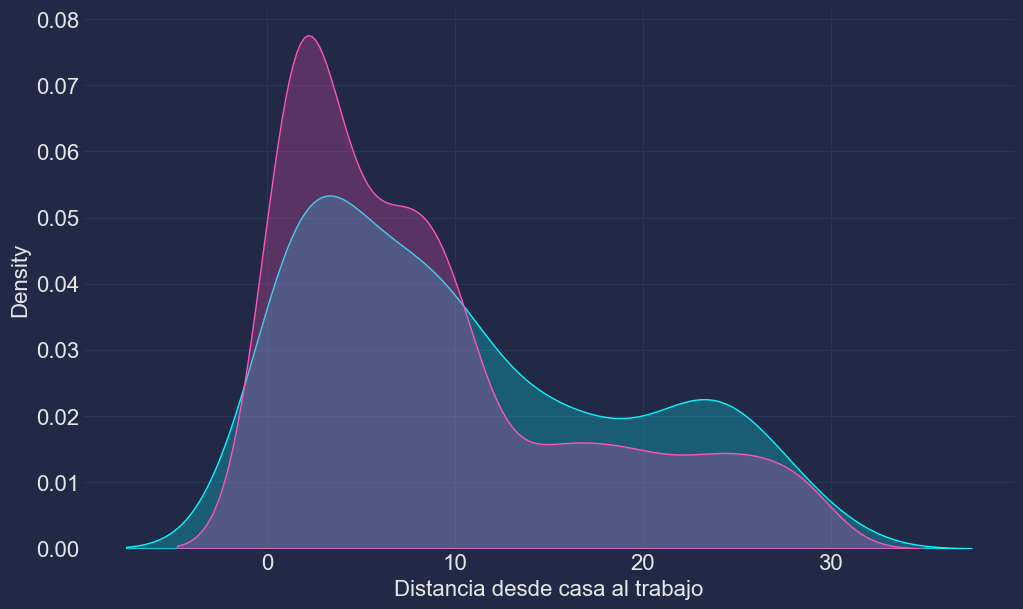

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(df[df["Attrition"]==1]['DistanceFromHome'], label="Empleados que desertan laboralmente", shade=True) # color = "b"
sns.kdeplot(df[df["Attrition"]==0]['DistanceFromHome'], label="Empleados que se quedan", shade=True) # color = "r"
plt.xlabel("Distancia desde casa al trabajo")

* La gente que vive entre 10 a 30 km alejado del trabajo tiende a desertar laboralmente.

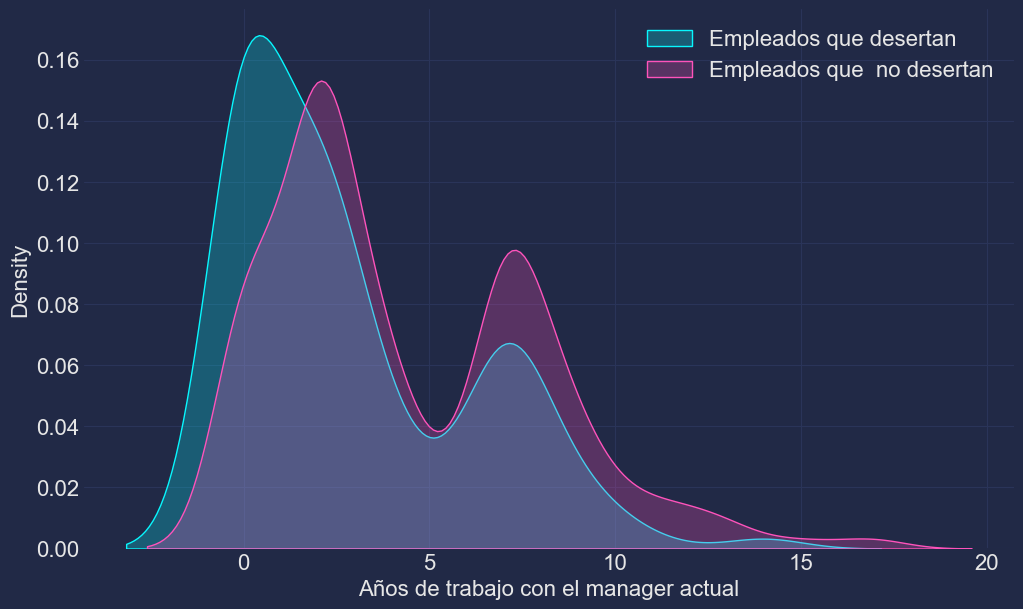

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(df[df["Attrition"]==1]['YearsWithCurrManager'], label="Empleados que desertan", shade=True) # color = "b"
sns.kdeplot(df[df["Attrition"]==0]['YearsWithCurrManager'], label="Empleados que  no desertan", shade=True) # color = "r"
plt.legend()
plt.xlabel("Años de trabajo con el manager actual");

* Se observa una distribucion bimodal.
* Las personas que llevan trabajando en sus inicios con el manager actual tienden a desertar que aquellas personas que ya llevan años en dicho manager.
* Se observa que aquellos que ya llevan más de 5 años trabajando con dicho manager tienden a permanecer en la empresa.

Text(0.5, 0, 'Años de trabajos')

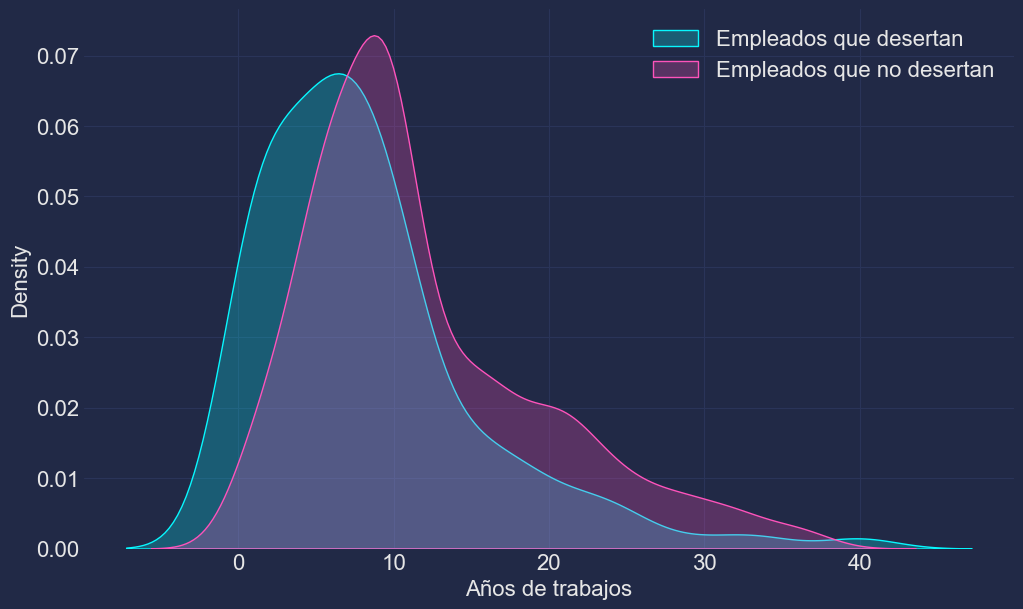

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(df[df["Attrition"]==1]['TotalWorkingYears'], label="Empleados que desertan", shade=True) # color = "b"
sns.kdeplot(df[df["Attrition"]==0]['TotalWorkingYears'], label="Empleados que no desertan", shade=True) # color = "r"
plt.legend()
plt.xlabel("Años de trabajos")

* Las personas con menos años de trabajo tienden a desertar laboralmente.

Text(0.5, 1.0, 'Matriz de Correlación')

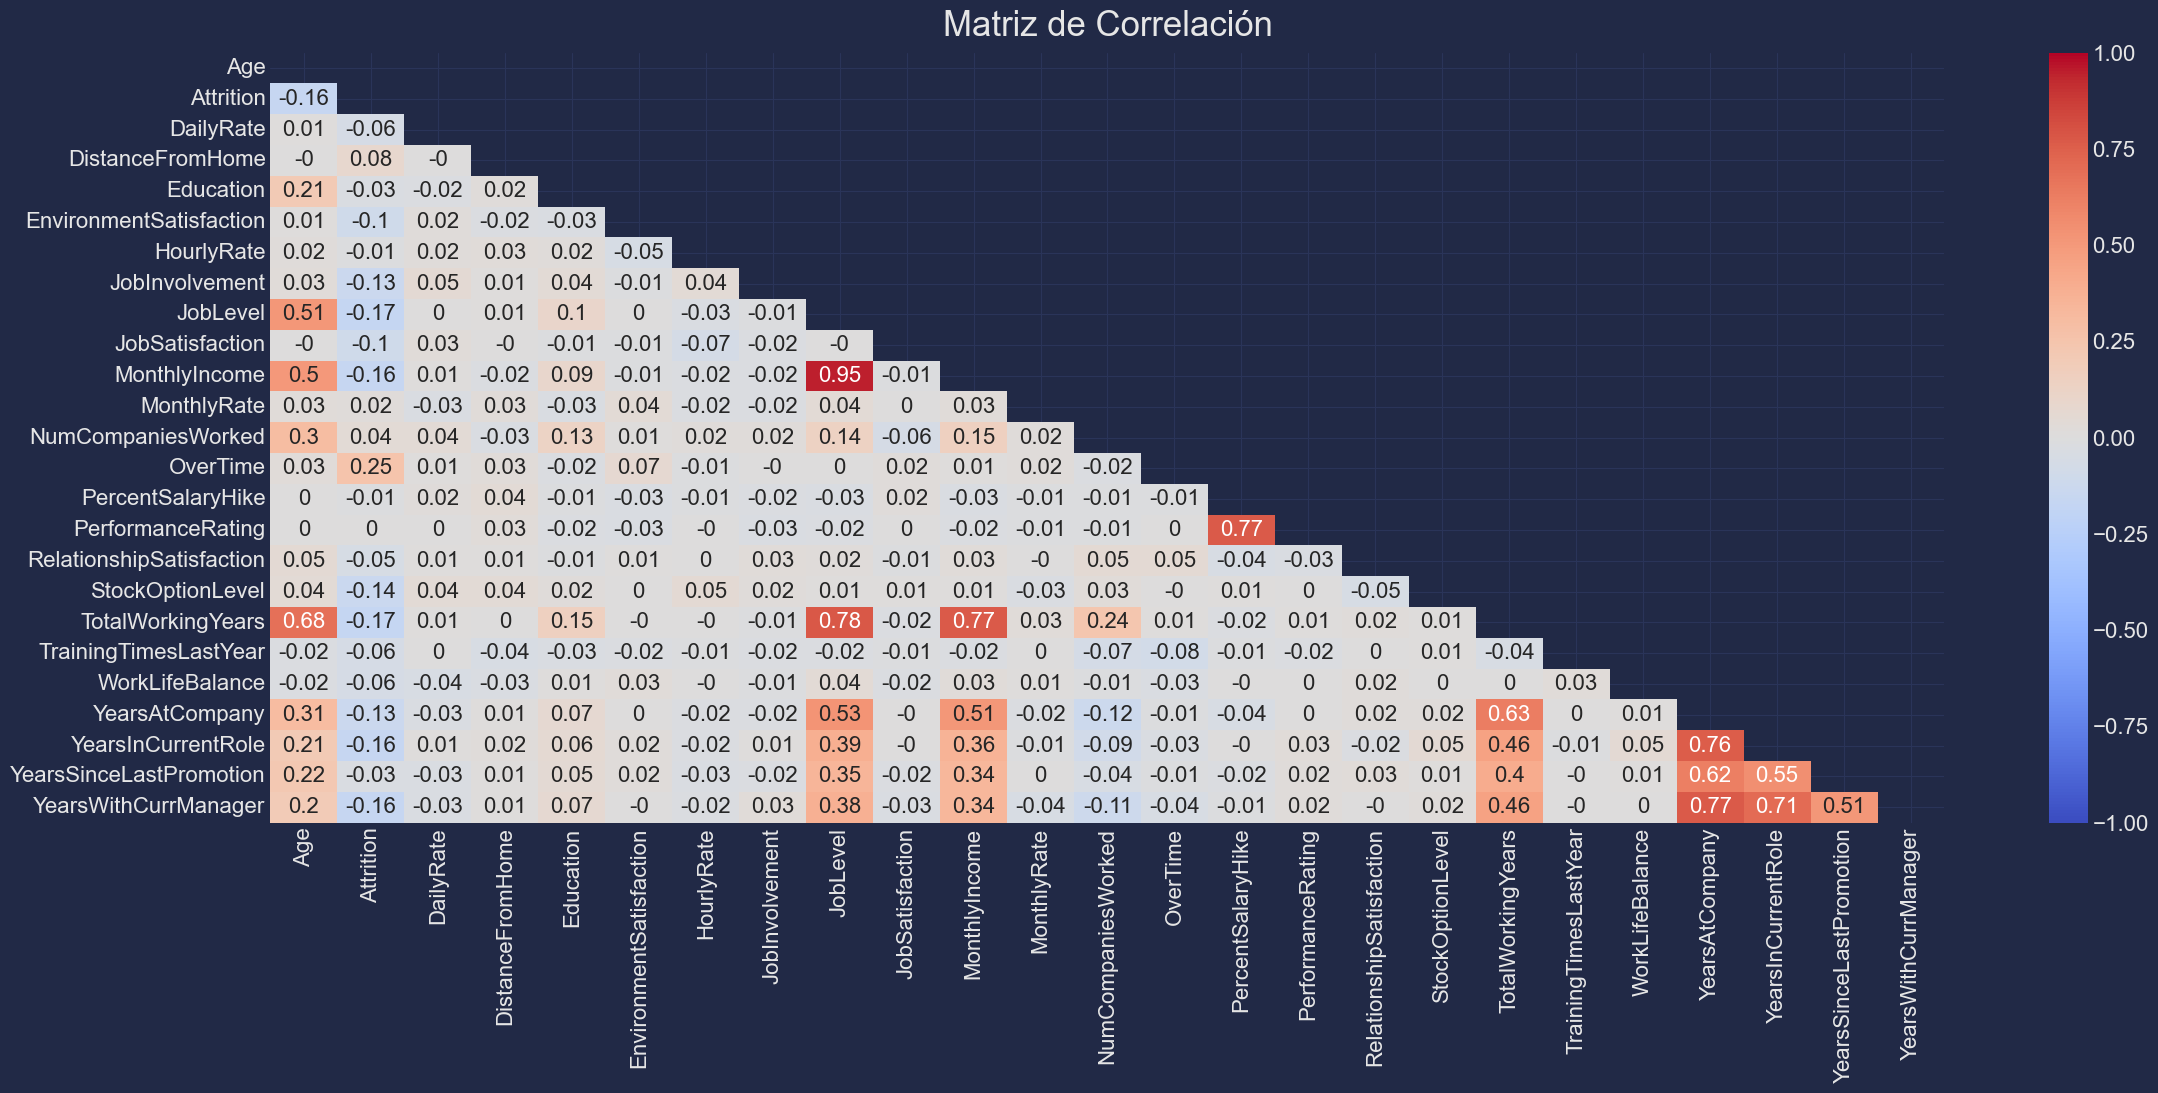

In [ ]:
plt.figure(figsize=(27, 10))
corr = df.corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, mask=mask)
heatmap.set_title('Matriz de Correlación', fontdict={'fontsize':25}, pad=12)

* TotalWorkingYears, JobLevel, MonthlyIncome esta altamente correlacionado con el campo edad.
* OverTime esta ligeramente correlacionado con Attrition.
* TotalWorkingYears esta altamente correlacionado con JobLevel y MonthlyIncome.
* MonthlyIncome presenta muy alta correlacion con JobLevel.